<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 3: Graphs

### CS4907/CS6365 Machine Learning

__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

### Tools and Libraries for Graph Neural Networks

**PyG (PyTorch Geometric):**  
The ultimate library for working with Graph Neural Networks (GNNs). PyG offers comprehensive functionalities and is highly optimized for a variety of GNN architectures.

**GraphGym:**  
A powerful platform for designing and experimenting with Graph Neural Networks. GraphGym provides:
- Modularized GNN implementations.
- Simple hyperparameter tuning.
- Flexible user customization.

Both PyG and GraphGym are highly recommended for your course projects as they will save you time and provide advanced GNN functionalities.


### Graph Databases and Network Analytics Tools

**Graph Databases:**
- **Neo4j:** A leading graph database that supports complex queries on large-scale networks, making it ideal for storing and querying graph data.
- **Amazon Neptune:** A managed graph database service that supports both property graphs and RDF (Resource Description Framework) models, suitable for large-scale, high-availability applications.
- **Memgraph:** A high-performance in-memory graph database designed for real-time graph analytics and machine learning.

**Other Network Analytics Tools:**
- **SNAP.PY:** A Python library for large-scale network analysis and graph mining.
- **NetworkX:** A versatile library for the creation, manipulation, and study of complex networks and graphs.


### Modern Deep Learning Toolbox

**Designed for Simple Structures**
- The modern deep learning toolbox is primarily designed to handle simple data structures like sequences (e.g., time series, text) and grids (e.g., images, videos).

![Image illustrating sequences and grids](./img/trad-dl-toolbox.png)  <!-- Add your image file path here -->


### Why Graphs?

**Graphs: A Universal Language**
- Graphs are a general language for describing and analyzing entities with their relationships and interactions.
- They provide a powerful way to model complex systems where elements are interconnected, making them ideal for a wide range of applications.


**Reflecting Human Thought**
- As humans, we naturally think about our world in terms of connections and relationships: people in social networks, proteins in biological systems, cities in transportation networks.
- Graphs mirror this relational thinking, allowing us to capture the essence of how we perceive and interact with the world around us.

**Versatile Applications**
- Graphs are used across various fields such as social network analysis, biology, recommendation systems, and more, making them indispensable in both academic research and industry.

![Graph Visualization](./img/sample-graph.png) 

# Networks Are Complex: Size and Structure

- **Arbitrary Size and Topological Structure:**
  - Networks do not have the uniform spatial structure seen in grids or images.
  - Each network can vary greatly in size, from small graphs with a few nodes to massive networks with millions of nodes.
  - Their topological structures are highly irregular and can include nodes with varying degrees of connectivity, making them challenging to model.
  - Unlike images or grids, which have clear spatial relationships (e.g., adjacent pixels), networks have connections that can span arbitrarily long distances.


# Networks Are Complex: Node Ordering and Reference Points

- **No Fixed Node Ordering or Reference Point:**
  - In sequences like time series or grids, nodes (or data points) follow a clear, ordered sequence (e.g., left to right, top to bottom).
  - Networks lack this natural ordering; nodes are not inherently arranged in any specific order, leading to variability in how networks are represented and processed.
  - There is no consistent "starting point" or reference node, which complicates tasks like traversal, feature extraction, and comparison.
  - Algorithms must be designed to be invariant to node ordering, ensuring consistent outputs regardless of how nodes are initially indexed.


# Networks Are Complex: Dynamics and Multimodality

- **Dynamic and Multimodal Features:**
  - Many real-world networks are dynamic, meaning they evolve over time as nodes and edges are added, removed, or modified.
  - This temporal aspect introduces additional complexity, as models must account for changes and trends over time rather than assuming a static structure.
  - Networks can also be multimodal, incorporating various types of data associated with nodes and edges, such as text (social media posts), images (profile pictures), or numerical data (weights, attributes).
  - Handling this diversity requires sophisticated models capable of integrating and processing multiple data modalities simultaneously.

![Networks vs Images](./img/networks-vs-images.png)


### Example Types of Graphs

**Event Graphs:**
- Represent events and their causal relationships, often used in temporal data analysis.


**Computer Networks:**
- Illustrate the connections between devices in a network, crucial for understanding and optimizing network infrastructure.


**Food Webs:**
- Depict the feeding relationships between species in an ecosystem, essential for studying ecological dynamics.


**Underground Networks:**
- Map out the connections between root systems of plants or fungal networks, revealing complex interdependencies in soil ecosystems.



**Economic Networks:**
- Show the interactions between different economic agents, such as companies, markets, and countries, used for financial analysis and market predictions.

### Types of Graphs (cont.)

**Citation Networks:**
- Represent the references between academic papers, helping to trace the development of research fields and identify key works.



**Communication Networks:**
- Describe the flow of information between individuals or organizations, vital for studying social dynamics and information dissemination.


**Social Networks:**
- Capture the relationships and interactions among people, often analyzed to understand community structure and influence.



**Transportation Networks:**
- Map out the routes and connections between different transportation hubs, important for optimizing logistics and urban planning.



**Neuronal Networks:**
- Represent the connections between neurons in the brain, used both in biological studies to understand brain function and structure.

### Graph Machine Learning

**What is Graph Machine Learning?**
- Graph Machine Learning involves leveraging the unique structure of graphs to build models that can learn from and make predictions on graph-structured data.


**Why Graphs?**
- Complex domains often consist of entities (nodes) and their interconnections (edges), which can be naturally represented as graphs.
- By explicitly modeling these relationships, Graph ML captures the dependencies and interactions between entities, leading to more accurate and meaningful predictions.

**Key Challenge:**
- How do we effectively utilize this relational structure to enhance model performance and make better predictions?


### Types of Graphs


# Heterogeneous Graphs

- **Definition:**
  - Heterogeneous graphs consist of multiple types of nodes and edges.
  - They are more complex and representative of real-world networks, such as social networks, knowledge graphs, and recommendation systems.

- **Examples:**
  - **Social Networks:** Nodes can represent users, posts, and groups, while edges can represent friendships, likes, and memberships.
  - **Academic Networks:** Nodes can include authors, papers, and institutions, with edges representing authorship, citations, and affiliations.



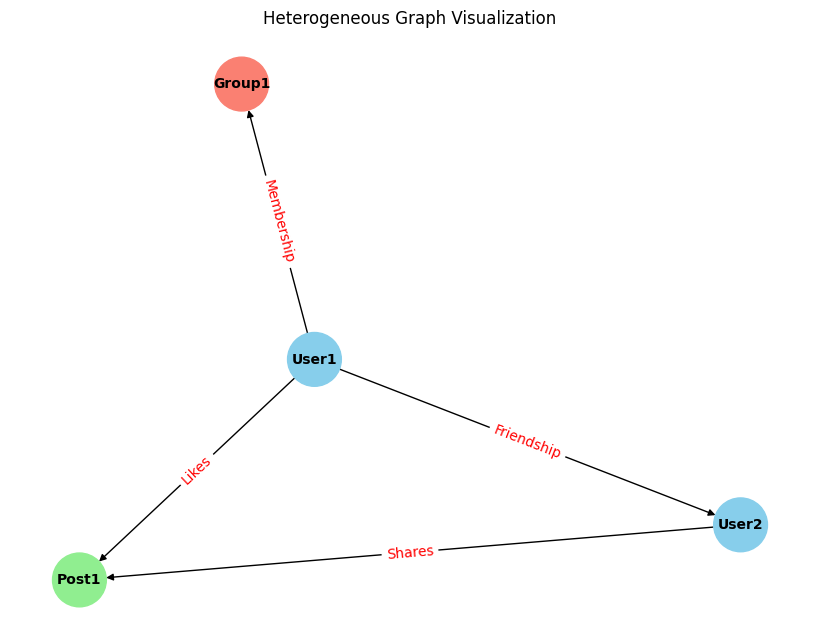

In [1]:
# Python Code to Visualize a Heterogeneous Graph

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed heterogeneous graph
G = nx.DiGraph()

# Adding nodes of different types
G.add_node("User1", type="User")
G.add_node("User2", type="User")
G.add_node("Post1", type="Post")
G.add_node("Group1", type="Group")

# Adding edges of different types
G.add_edge("User1", "User2", type="Friendship")
G.add_edge("User1", "Post1", type="Likes")
G.add_edge("User1", "Group1", type="Membership")
G.add_edge("User2", "Post1", type="Shares")

# Define colors for different types of nodes
node_colors = []
for node, data in G.nodes(data=True):
    if data['type'] == 'User':
        node_colors.append('skyblue')
    elif data['type'] == 'Post':
        node_colors.append('lightgreen')
    elif data['type'] == 'Group':
        node_colors.append('salmon')

# Define edge labels
edge_labels = {("User1", "User2"): "Friendship", ("User1", "Post1"): "Likes",
               ("User1", "Group1"): "Membership", ("User2", "Post1"): "Shares"}

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning the nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Heterogeneous Graph Visualization")
plt.show()


# Homogeneous Graphs

- **Definition:**
  - Homogeneous graphs consist of nodes and edges of the same type.
  - These graphs are simpler and are often used in basic network analyses where uniformity is assumed.

- **Examples:**
  - **Social Networks:** All nodes represent users, and all edges represent friendships or connections.
  - **Citation Networks:** All nodes represent papers, and all edges represent citations between them.
  - **Road Networks:** All nodes represent intersections, and all edges represent roads connecting them.
  - **Computer Networks:** All nodes represent computers or servers, and all edges represent connections like Ethernet cables or Wi-Fi links.
  - **Biological Networks:** All nodes represent proteins, and all edges represent interactions between proteins (e.g., protein-protein interaction networks).


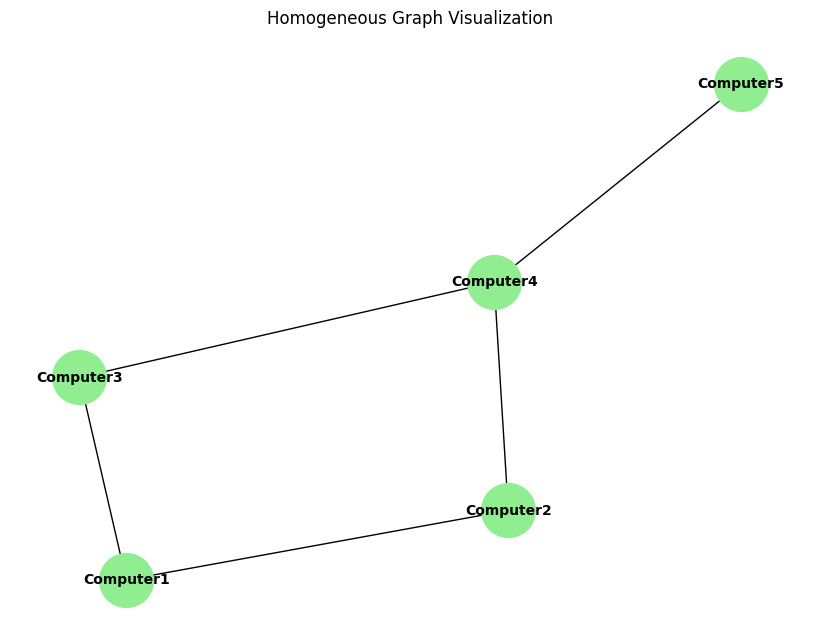

In [2]:
# Python Code to Visualize a Homogeneous Graph

import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected homogeneous graph
G = nx.Graph()

# Adding nodes (e.g., computers in a network)
G.add_nodes_from(["Computer1", "Computer2", "Computer3", "Computer4", "Computer5"])

# Adding edges (e.g., network connections between computers)
G.add_edges_from([("Computer1", "Computer2"), ("Computer1", "Computer3"), 
                  ("Computer2", "Computer4"), ("Computer3", "Computer4"), 
                  ("Computer4", "Computer5")])

# Define a single color for all nodes (since they are of the same type)
node_colors = 'lightgreen'

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Positioning the nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold')
plt.title("Homogeneous Graph Visualization")
plt.show()


# Directed Graphs

- **Definition:**
  - Directed graphs have edges with a specific direction, indicating the flow or relationship from one node to another.
  - The direction of edges is represented by arrows pointing from a source node to a target node.

- **Examples:**
  - **Web Graphs:** Nodes represent web pages, and directed edges represent hyperlinks from one page to another.
  - **Social Media Networks:** Nodes represent users, and directed edges represent follows or likes (e.g., on Twitter, where one user follows another).
  - **Citation Networks:** Nodes represent academic papers, and directed edges indicate one paper citing another.
  - **Supply Chain Networks:** Nodes represent suppliers, manufacturers, and distributors, with directed edges indicating the flow of goods.
  - **Flight Routes:** Nodes represent airports, and directed edges represent flights from one airport to another.


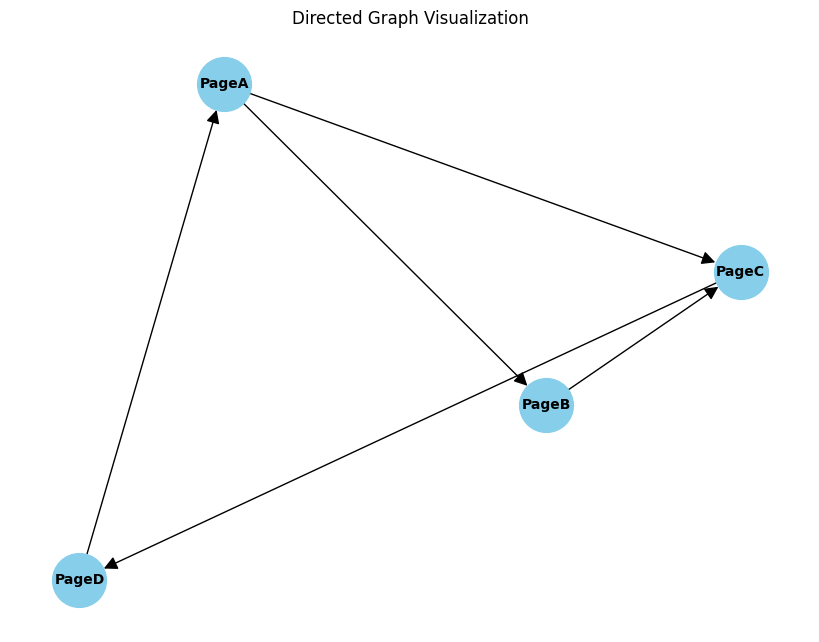

In [3]:
# Python Code to Visualize a Directed Graph

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
DG = nx.DiGraph()

# Adding nodes (e.g., web pages)
DG.add_nodes_from(["PageA", "PageB", "PageC", "PageD"])

# Adding directed edges (e.g., hyperlinks between pages)
DG.add_edges_from([("PageA", "PageB"), ("PageA", "PageC"), 
                   ("PageB", "PageC"), ("PageC", "PageD"),
                   ("PageD", "PageA")])

# Define a color for the nodes
node_colors = 'skyblue'

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG, seed=42)  # Positioning the nodes
nx.draw(DG, pos, with_labels=True, node_color=node_colors, node_size=1500, 
        font_size=10, font_weight='bold', arrowsize=20)
plt.title("Directed Graph Visualization")
plt.show()


# Undirected Graphs

- **Definition:**
  - Undirected graphs have edges without any specific direction, indicating bidirectional or mutual relationships between nodes.
  - In undirected graphs, connections are symmetric, meaning if there is an edge between node A and node B, it implies a mutual relationship.

- **Examples:**
  - **Social Networks:** Nodes represent users, and edges represent friendships, where the connection is reciprocal.
  - **Collaboration Networks:** Nodes represent individuals (e.g., researchers), and edges represent collaborations (e.g., co-authorship on papers).
  - **Protein Interaction Networks:** Nodes represent proteins, and edges represent physical interactions between them.
  - **Road Networks:** Nodes represent intersections, and edges represent roads that allow travel in both directions.
  - **Peer-to-Peer Networks:** Nodes represent devices, and edges represent connections that facilitate mutual data exchange.


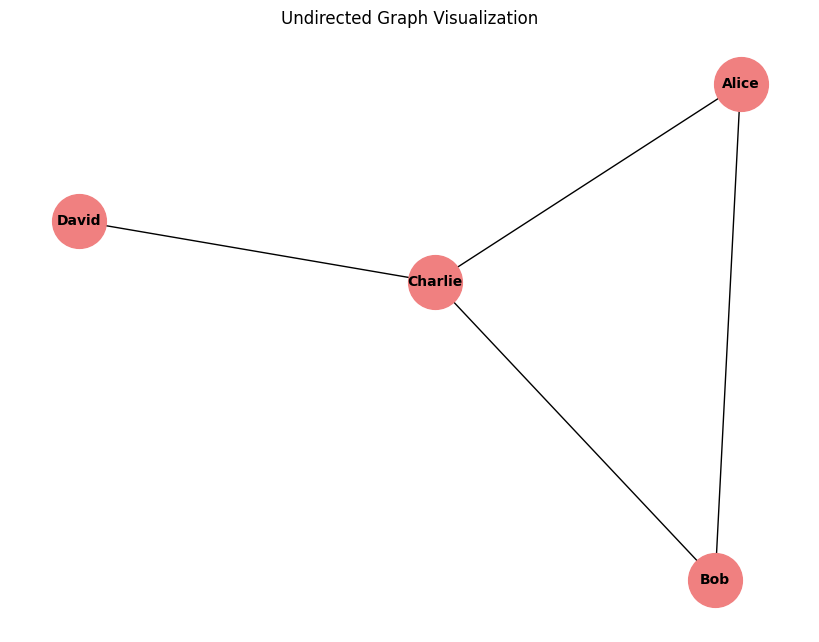

In [4]:
# Python Code to Visualize an Undirected Graph

import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
UG = nx.Graph()

# Adding nodes (e.g., people in a social network)
UG.add_nodes_from(["Alice", "Bob", "Charlie", "David"])

# Adding undirected edges (e.g., friendships)
UG.add_edges_from([("Alice", "Bob"), ("Alice", "Charlie"), 
                   ("Bob", "Charlie"), ("Charlie", "David")])

# Define a color for the nodes
node_colors = 'lightcoral'

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(UG, seed=42)  # Positioning the nodes
nx.draw(UG, pos, with_labels=True, node_color=node_colors, node_size=1500, 
        font_size=10, font_weight='bold')
plt.title("Undirected Graph Visualization")
plt.show()


# Weighted Graphs

- **Definition:**
  - Weighted graphs have edges with associated weights, which represent the strength, capacity, cost, or any other measure of the relationship between nodes.
  - Weights add an extra layer of information to the graph, allowing for more nuanced analysis.

- **Examples:**
  - **Transportation Networks:** Nodes represent locations (e.g., cities), and edges represent routes with weights indicating distances, travel times, or costs.
  - **Financial Networks:** Nodes represent entities (e.g., banks), and edges represent financial transactions with weights indicating transaction amounts.
  - **Communication Networks:** Nodes represent devices or servers, and edges represent connections with weights indicating bandwidth, latency, or signal strength.
  - **Supply Chain Networks:** Nodes represent suppliers and manufacturers, and edges have weights representing costs or delivery times.
  - **Social Networks:** Nodes represent individuals, and edges represent interactions with weights indicating the frequency or strength of interactions (e.g., number of messages exchanged).



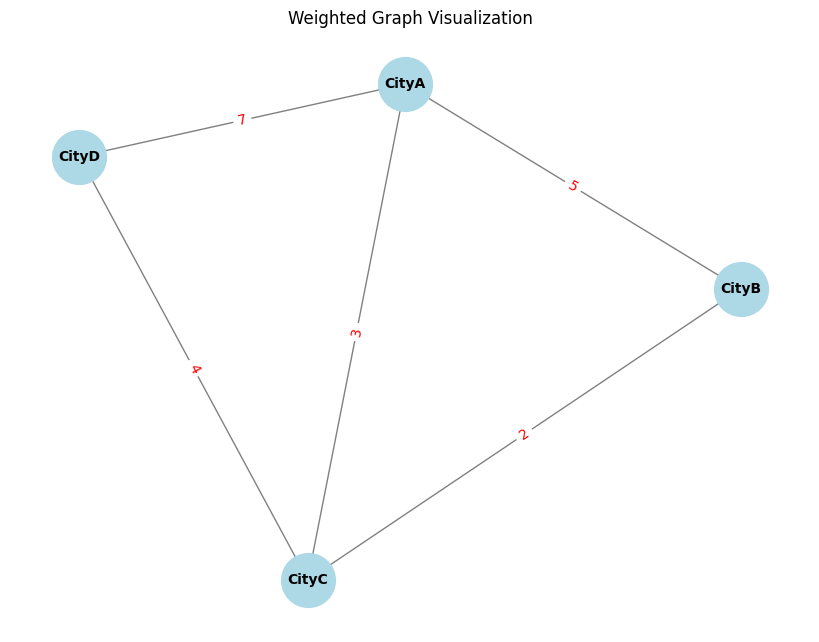

In [5]:
# Python Code to Visualize a Weighted Graph

import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted graph
WG = nx.Graph()

# Adding nodes (e.g., cities in a transportation network)
WG.add_nodes_from(["CityA", "CityB", "CityC", "CityD"])

# Adding weighted edges (e.g., routes with distances)
WG.add_edge("CityA", "CityB", weight=5)
WG.add_edge("CityA", "CityC", weight=3)
WG.add_edge("CityB", "CityC", weight=2)
WG.add_edge("CityC", "CityD", weight=4)
WG.add_edge("CityD", "CityA", weight=7)

# Define a color for the nodes
node_colors = 'lightblue'

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(WG, seed=42)  # Positioning the nodes
nx.draw(WG, pos, with_labels=True, node_color=node_colors, node_size=1500, 
        font_size=10, font_weight='bold', edge_color='gray')

# Draw edge labels to show weights
edge_labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=edge_labels, font_color='red')

plt.title("Weighted Graph Visualization")
plt.show()


# Dynamic Graphs

- **Definition:**
  - Dynamic graphs have structures that change over time, with nodes or edges that can appear, disappear, or change in weight.
  - These graphs capture the evolving nature of relationships, making them suitable for modeling real-world scenarios where connections are not static.

- **Examples:**
  - **Evolving Social Networks:** Nodes represent users, and edges represent interactions like friendships or follows, which can change over time as users connect or disconnect.
  - **Communication Networks:** Nodes represent devices or servers, and edges represent data flows or calls, which can vary dynamically based on usage patterns.
  - **Trading Networks:** Nodes represent traders or companies, and edges represent transactions, which change with market conditions.
  - **Biological Networks:** Nodes represent proteins or genes, and edges represent interactions that can be activated or deactivated under different conditions.
  - **Traffic Networks:** Nodes represent intersections, and edges represent roads; traffic conditions can change dynamically based on time of day or accidents.



In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import random

# Create a dynamic graph with initial nodes and edges
DG = nx.Graph()

# Initial nodes and edges with random weights
DG.add_nodes_from(["Node1", "Node2", "Node3"])
DG.add_edges_from([("Node1", "Node2", {'weight': random.randint(1, 10)}), 
                   ("Node2", "Node3", {'weight': random.randint(1, 10)})])

# Function to generate random weights for edges
def random_weight():
    return random.randint(1, 10)

# Function to update the graph dynamically
def update(num):
    plt.clf()  # Clear the plot to draw the next frame
    
    # Simulate adding, modifying, and removing nodes and edges
    if num == 1:
        DG.add_edge("Node1", "Node3", weight=random_weight())  # Add an edge with a random weight
    elif num == 2:
        DG.add_node("Node4")  # Add a new node
        DG.add_edge("Node3", "Node4", weight=random_weight())  # Connect the new node with a random weight
    elif num == 3:
        DG.add_node("Node5")  # Add another node
        DG.add_edge("Node2", "Node5", weight=random_weight())  # Connect the new node
    elif num == 4:
        DG.add_edge("Node4", "Node5", weight=random_weight())  # Add an edge between existing nodes
    elif num == 5:
        DG.remove_edge("Node1", "Node2")  # Remove an existing edge
    elif num == 6:
        DG.remove_node("Node3")  # Remove a node and associated edges

    # Update positions of all nodes including new ones
    pos = nx.spring_layout(DG, seed=42)  # Recalculate positions with the updated graph
    
    # Define node colors based on their label
    node_colors = ['skyblue' if '1' in node else 
                   'orange' if '2' in node else 
                   'lightgreen' if '3' in node else 
                   'lightcoral' for node in DG.nodes()]
    
    # Get edge weights
    edge_weights = nx.get_edge_attributes(DG, 'weight')
    
    # Draw the graph
    nx.draw(DG, pos, with_labels=True, node_color=node_colors, node_size=1500, 
            font_size=10, font_weight='bold', 
            width=[0.2*DG[u][v]['weight'] for u,v in DG.edges()], 
            edge_color='gray')
    
    # Draw edge labels to show weights
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_weights, font_color='red')
    plt.title(f"Dynamic Graph Visualization - Step {num+1}")

# Create the animation
fig = plt.figure(figsize=(8, 6))
ani = FuncAnimation(fig, update, frames=7, repeat=False)

# Save the animation as a GIF and display it
ani.save('img/dynamic_graph_animation_1.gif', writer=PillowWriter(fps=1))
plt.close(fig)

# Display the GIF
from IPython.display import HTML
HTML('<img src="img/dynamic_graph_animation_1.gif">')


# Bipartite Graphs

**Definition:**
- A bipartite graph is a graph whose nodes can be divided into two disjoint and independent sets, U and V, such that every edge connects a node in U to one in V.

**Significance:**
- Useful in modeling relationships between two different classes of objects.

**Examples:**
- **Social Networks:** Users and groups.
- **Recommendation Systems:** Users and items (movies, books).
- **Biological Networks:** Proteins and functions or drugs and diseases.


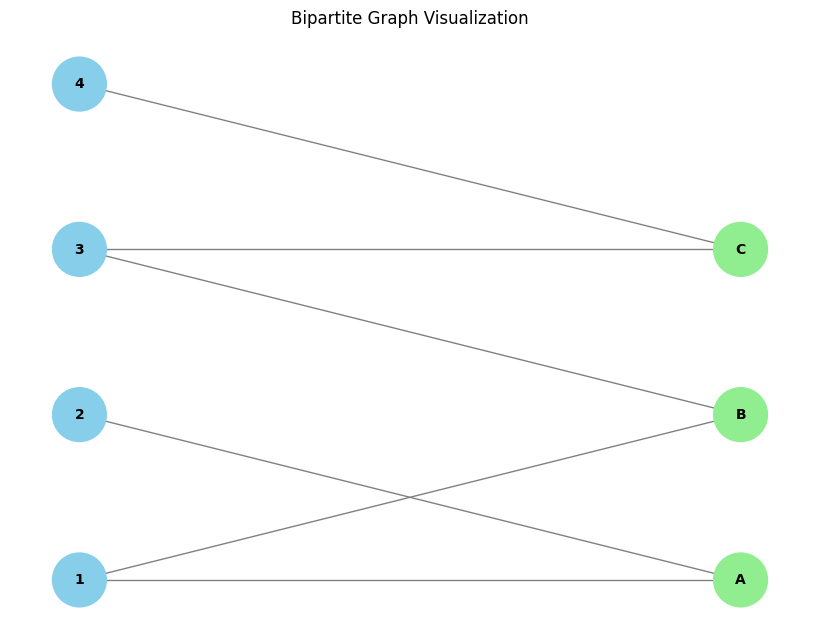

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the bipartite attribute
U = ["1", "2", "3", "4"]
V = ["A", "B", "C"]
B.add_nodes_from(U, bipartite=0)  # Add nodes to one set
B.add_nodes_from(V, bipartite=1)  # Add nodes to the other set

# Add edges between the two sets
edges = [("1", "A"), ("1", "B"), ("2", "A"), ("3", "B"), ("3", "C"), ("4", "C")]
B.add_edges_from(edges)

# Position nodes from different sets in two distinct lines
pos = {node: (1, i) for i, node in enumerate(U)}
pos.update({node: (2, i) for i, node in enumerate(V)})

# Draw the bipartite graph
plt.figure(figsize=(8, 6))
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in U else 'lightgreen' for node in B.nodes()],
        node_size=1500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Bipartite Graph Visualization")
plt.show()


# Folded/Projected Bipartite Graphs

**Definition:**
- Projection in bipartite graphs involves collapsing one set of nodes while preserving relationships via shared connections in the other set.

**Significance:**
- Simplifies analysis by focusing on one set of entities while still capturing the structure implied by the other set.

**Projections:**
- **Projection U:** Focus on U nodes connected by shared V nodes.
- **Projection V:** Focus on V nodes connected by shared U nodes.

**Applications:**
- **Social Networks:** Analyzing user interactions by projecting connections between common groups or activities.
- **Collaborative Filtering:** Users are connected based on shared interests or products.


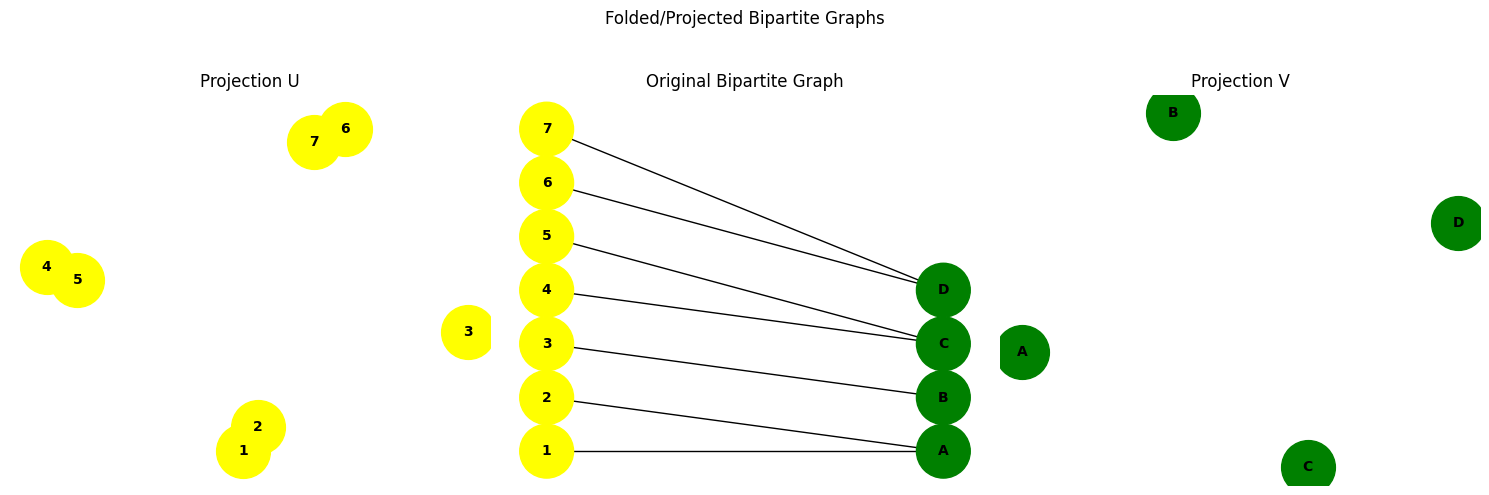

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Create the bipartite graph as before
B = nx.Graph()
U = ["1", "2", "3", "4", "5", "6", "7"]
V = ["A", "B", "C", "D"]
B.add_nodes_from(U, bipartite=0)
B.add_nodes_from(V, bipartite=1)
edges = [("1", "A"), ("2", "A"), ("3", "B"), ("4", "C"), ("5", "C"), ("6", "D"), ("7", "D")]
B.add_edges_from(edges)

# Compute projections
proj_U = bipartite.projected_graph(B, U)
proj_V = bipartite.projected_graph(B, V)

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Folded/Projected Bipartite Graphs")

# Draw Projection U
nx.draw(proj_U, with_labels=True, ax=axes[0], node_color='yellow', node_size=1500, font_size=10, font_weight='bold')
axes[0].set_title("Projection U")

# Draw the original bipartite graph
pos = {node: (1, i) for i, node in enumerate(U)}
pos.update({node: (2, i) for i, node in enumerate(V)})
nx.draw(B, pos, with_labels=True, ax=axes[1], node_color=['yellow' if node in U else 'green' for node in B.nodes()],
        node_size=1500, font_size=10, font_weight='bold')
axes[1].set_title("Original Bipartite Graph")

# Draw Projection V
nx.draw(proj_V, with_labels=True, ax=axes[2], node_color='green', node_size=1500, font_size=10, font_weight='bold')
axes[2].set_title("Projection V")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Heterogeneous Graphs

A heterogeneous graph is defined as:

$$
\mathcal{G} = (\mathcal{V}, \mathcal{E}, \mathcal{R}, \mathcal{T})
$$

- **Nodes with node types:** $$ v_i \in \mathcal{V} $$
- **Edges with relation types:** $$ (v_i, r, v_j) \in \mathcal{E} $$
- **Node type:** $$ T(v_i) $$
- **Relation type:** $$ r \in \mathcal{R} $$
- **Attributes/Features:**
  - Nodes and edges in the graph have associated attributes or features.


# Representing Graphs: Adjacency Matrix

**Definition:**
- The adjacency matrix $A$ is a square matrix used to represent a graph. 
- For a graph with $n$ nodes, $A$ is an $n \times n$ matrix where each element $A_{ij}$ indicates whether there is an edge between nodes $i$ and $j$.

**Matrix Values:**
- $A_{ij} = 1$ if there is a link from node $i$ to node $j$.
- $A_{ij} = 0$ otherwise.

**Examples:**
- **Undirected Graph (Left):**
  - The matrix is symmetric, as edges are bidirectional.
  - Example Matrix:
    $$
    A = 
    \begin{bmatrix}
    0 & 1 & 0 & 1 \\
    1 & 0 & 0 & 1 \\
    0 & 0 & 0 & 1 \\
    1 & 1 & 1 & 0
    \end{bmatrix}
    $$


- **Directed Graph (Right):**
  - The matrix is not necessarily symmetric, as edges have direction.
  - Example Matrix:
    $$
    A = 
    \begin{bmatrix}
    0 & 0 & 0 & 1 \\
    1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 1 & 1 & 0
    \end{bmatrix}
    $$

**Note:**
- For directed graphs, the adjacency matrix is not symmetric, reflecting the directionality of edges.

# Adjacency Matrix

## Undirected Graphs:
- **Graph Representation:**
  - The adjacency matrix $A$ for an undirected graph is symmetric, meaning $A_{ij} = A_{ji}$.
  - No self-loops: $A_{ii} = 0$.
  
- **Matrix and Degree Calculations:**
  - Adjacency Matrix:
    $$
    A = 
    \begin{bmatrix}
    0 & 1 & 0 & 1 \\
    1 & 0 & 0 & 1 \\
    0 & 0 & 0 & 1 \\
    1 & 1 & 1 & 0
    \end{bmatrix}
    $$
  - Degree of node $i$: $k_i = \sum_{j=1}^{N} A_{ij}$
  - Total degree: $L = \frac{1}{2} \sum_{i=1}^{N} k_i = \frac{1}{2} \sum_{i,j=1}^{N} A_{ij}$


## Directed Graphs:
- **Graph Representation:**
  - The adjacency matrix $A$ for a directed graph is not necessarily symmetric, reflecting directionality: $A_{ij} \neq A_{ji}$.
  - No self-loops: $A_{ii} = 0$.
  
- **Matrix and Degree Calculations:**
  - Adjacency Matrix:
    $$
    A = 
    \begin{bmatrix}
    0 & 0 & 0 & 1 \\
    1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 1 & 1 & 0
    \end{bmatrix}
    $$
  - Out-degree of node $i$: $k_i^{\text{out}} = \sum_{j=1}^{N} A_{ij}$
  - In-degree of node $j$: $k_j^{\text{in}} = \sum_{i=1}^{N} A_{ij}$
  - Total degree: $L = \sum_{i=1}^{N} k_i^{\text{in}} = \sum_{j=1}^{N} k_j^{\text{out}} = \sum_{i,j=1}^{N} A_{ij}$

# Adjacency Matrices: Sparsity

## Key Concept:
- **Sparsity**: In large graphs, most adjacency matrices are sparse, meaning they contain many zeros.
  
## Why Sparse?
- **Real-World Networks**:
  - Social networks, biological networks, and web graphs typically have few connections relative to the possible number of connections, leading to sparse matrices.
  
- **Advantages of Sparsity**:
  - **Memory Efficiency**: Storing only the non-zero entries reduces memory usage significantly.
  - **Computational Efficiency**: Algorithms can exploit sparsity for faster computations, such as matrix multiplications and traversals.
  
## Sparse Matrix Representation:
- **Compressed Sparse Row (CSR) / Column (CSC) Format**:
  - Store only non-zero elements and their positions, greatly reducing storage requirements.
  
- **Example**:
  - A graph with 1000 nodes but only 10,000 edges has an adjacency matrix with 1,000,000 possible entries, but only 1% non-zero entries, making it highly sparse.


In [26]:
import numpy as np
from scipy.sparse import csr_matrix

# Example of a sparse adjacency matrix
adj_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 1, 0, 0]
])

# Convert to CSR format
sparse_adj = csr_matrix(adj_matrix)

print(sparse_adj)


  (np.int32(0), np.int32(1))	1
  (np.int32(1), np.int32(0))	1
  (np.int32(1), np.int32(3))	1
  (np.int32(3), np.int32(1))	1


# Representing Graphs: Adjacency List

---

### Adjacency List Representation:

- **Definition:** An adjacency list represents a graph as a collection of lists. Each node has a list that contains the nodes it is connected to.
- **Structure:** 
  - Each vertex has a linked list of other vertices connected to it by an edge.
  - Efficient for sparse graphs, as it uses less space compared to an adjacency matrix.

---

**Example:**

- Graph with nodes: 1, 2, 3, 4

$$
\text{Adjacency List:}
$$

- Node 1: 2, 4
- Node 2: 1, 3
- Node 3: 2, 4
- Node 4: 1, 3





**Advantages:**
- **Space Efficiency:** Requires less space compared to the adjacency matrix, especially for sparse graphs.
- **Time Efficiency:** Efficient for iterating over edges of a particular vertex.

**Disadvantages:**
- **Access Time:** Slower access to check if a specific edge exists between two nodes compared to adjacency matrices.

# Graph Connectivity: Strongly Connected vs. Weakly Connected


### Strongly Connected Graphs:

- **Definition:** A directed graph is **strongly connected** if there is a path from each node to every other node in the graph.
- **Characteristics:**
  - Applicable only to directed graphs.
  - Every node must be reachable from every other node, considering the direction of edges.
  

### Weakly Connected Graphs:

- **Definition:** A directed graph is **weakly connected** if replacing all of its directed edges with undirected edges makes the graph connected.
- **Characteristics:**
  - Applicable to directed graphs.
  - There exists a path between any two nodes if direction is ignored.


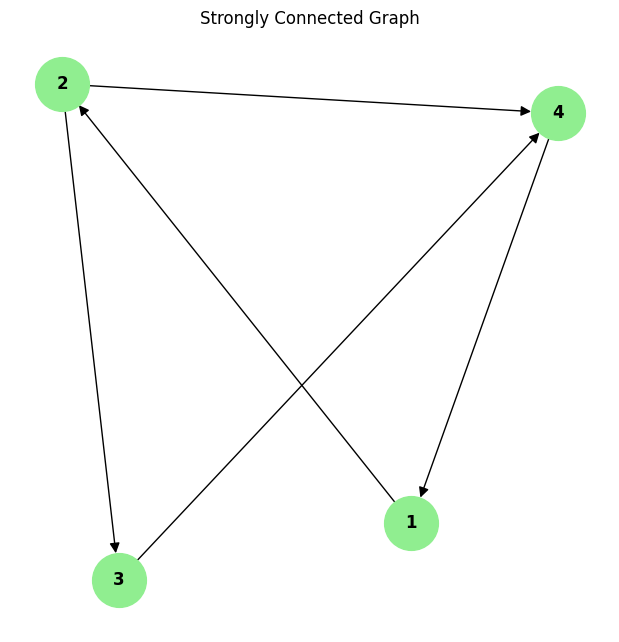

In [27]:
# Python code to visualize a strongly connected graph

import networkx as nx
import matplotlib.pyplot as plt

# Creating a strongly connected graph
strongly_connected_graph = nx.DiGraph()
strongly_connected_graph.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

# Plotting the strongly connected graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(strongly_connected_graph)
nx.draw(strongly_connected_graph, pos, with_labels=True, node_color='lightgreen', 
        node_size=1500, edge_color='black', font_weight='bold', arrowsize=15)
plt.title("Strongly Connected Graph")
plt.show()


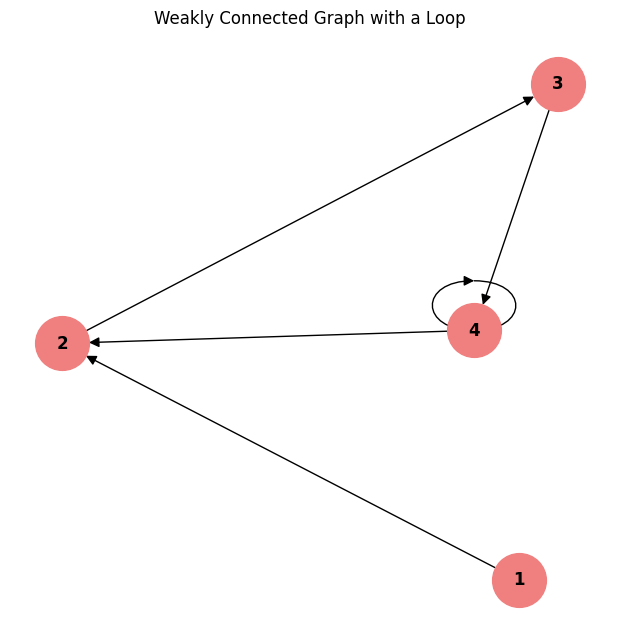

In [30]:
# Python code to visualize a weakly connected graph with a loop

import networkx as nx
import matplotlib.pyplot as plt

# Creating a weakly connected graph with a loop
weakly_connected_graph_with_loop = nx.DiGraph()
weakly_connected_graph_with_loop.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 2), (4, 4)]) # Node 4 has a loop

# Plotting the weakly connected graph with a loop
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(weakly_connected_graph_with_loop)
nx.draw(weakly_connected_graph_with_loop, pos, with_labels=True, node_color='lightcoral', 
        node_size=1500, edge_color='black', font_weight='bold', arrowsize=15)
plt.title("Weakly Connected Graph with a Loop")
plt.show()


# Networks are Sparse Graphs

## Key Insight:
- **Most real-world networks are sparse**:
  - The number of edges $E$ is much less than the maximum possible edges $E_{max}$.
  - Alternatively, the average degree $k$ is much less than $N-1$ (where $N$ is the number of nodes).



## Examples of Sparse Networks:
- **Internet**:
  - Nodes: Routers
  - Links: Internet connections (undirected)
  - $(N = 192,244)$, $(L = 609,066)$, $(\langle k \rangle = 6.33)$
 

- **World Wide Web (WWW)**:
  - Nodes: Webpages
  - Links: Hyperlinks (directed)
  - $(N = 325,729)$, $(L = 1,497,134)$, $(\langle k \rangle = 4.60)$

- **Power Grid**:
  - Nodes: Power plants, transformers
  - Links: Power cables (undirected)
  - $(N = 4,941)$, $(L = 6,594)$, $(\langle k \rangle = 2.67)$


- **Citation Network**:
  - Nodes: Papers
  - Links: Citations (directed)
  - $(N = 449,673)$, $(L = 4,689,479)$, $(\langle k \rangle = 10.43)$
  

- **Protein Interaction Network**:
  - Nodes: Proteins
  - Links: Protein interactions (undirected)
  - $(N = 2,018)$, $(L = 2,930)$, $(\langle k \rangle = 2.90)$

## Consequence:
- **Adjacency Matrix is filled with zeros** due to sparse connections.
- **Density of the matrix $(E / N^2)$**:
  - Example: For WWW: $(1.51 \times 10^{-5})$, for MSN IM: $(2.27 \times 10^{-8})$
  
  
## NOTE:
### Density of the Matrix:

- For **undirected graphs**: 
  $$
  \text{Density} = \frac{E}{\frac{N(N-1)}{2}} = \frac{2E}{N(N-1)}
  $$

- For **directed graphs**: 
  $$
  \text{Density} = \frac{E}{N(N-1)}
  $$

- **Simplified Approximation:**
  $$
  \text{Density} \approx \frac{E}{N^2}
  $$

This approximation assumes a potential maximum of $ N^2 $ edges, including self-loops, to quickly estimate the scale of maximum possible connections.


### Choosing the Proper Representation


- **How to build a graph:**
  - What are nodes?
  - What are edges?

- **Choosing the Proper Network Representation:**
  - The choice of network representation for a given domain or problem is crucial to the successful application of network analysis.

- **Key Considerations:**
  - In some cases, there is a unique, unambiguous representation.
  - In other cases, the representation is not unique, and multiple valid representations may exist.
  - The way you assign links will determine the nature of the questions you can study.

# RDF vs Labeled Property Graph (LPG)



### RDF (Resource Description Framework)

- **Definition:** RDF is a standard model for data interchange on the web. It represents information as triples (subject, predicate, object).
  
- **Key Characteristics:**
  - **Triple-Based Structure:** Each piece of information is stored as a triple, representing nodes and edges indirectly.
  - **Schema Flexibility:** RDF doesn't enforce a strict schema, making it suitable for diverse data sources.
  - **Focus on Semantics:** Emphasizes the meaning and relationships between data, often used in Semantic Web and Linked Data.

**Example:** Describing a relationship:
  - **Triple:** (Person1, knows, Person2)
  - **Graph Representation:** Nodes for `Person1` and `Person2`, connected by a directed edge labeled `knows`.



### Labeled Property Graph (LPG)

- **Definition:** LPG is a type of graph where nodes and edges have labels and can hold properties (key-value pairs).
  
- **Key Characteristics:**
  - **Node and Edge Properties:** Nodes and edges can carry complex attributes (e.g., names, ages, weights).
  - **Schema Flexibility:** Supports complex, rich schemas with labeled relationships and properties.
  - **Graph Algorithms:** Supports advanced querying and graph algorithms directly on properties and labels.

**Example:** Describing a relationship:
  - **Nodes:** `Person1` with properties `{name: "Alice", age: 30}`, `Person2` with `{name: "Bob", age: 25}`
  - **Edge:** Directed from `Person1` to `Person2` with label `knows` and property `{since: "2020"}`.




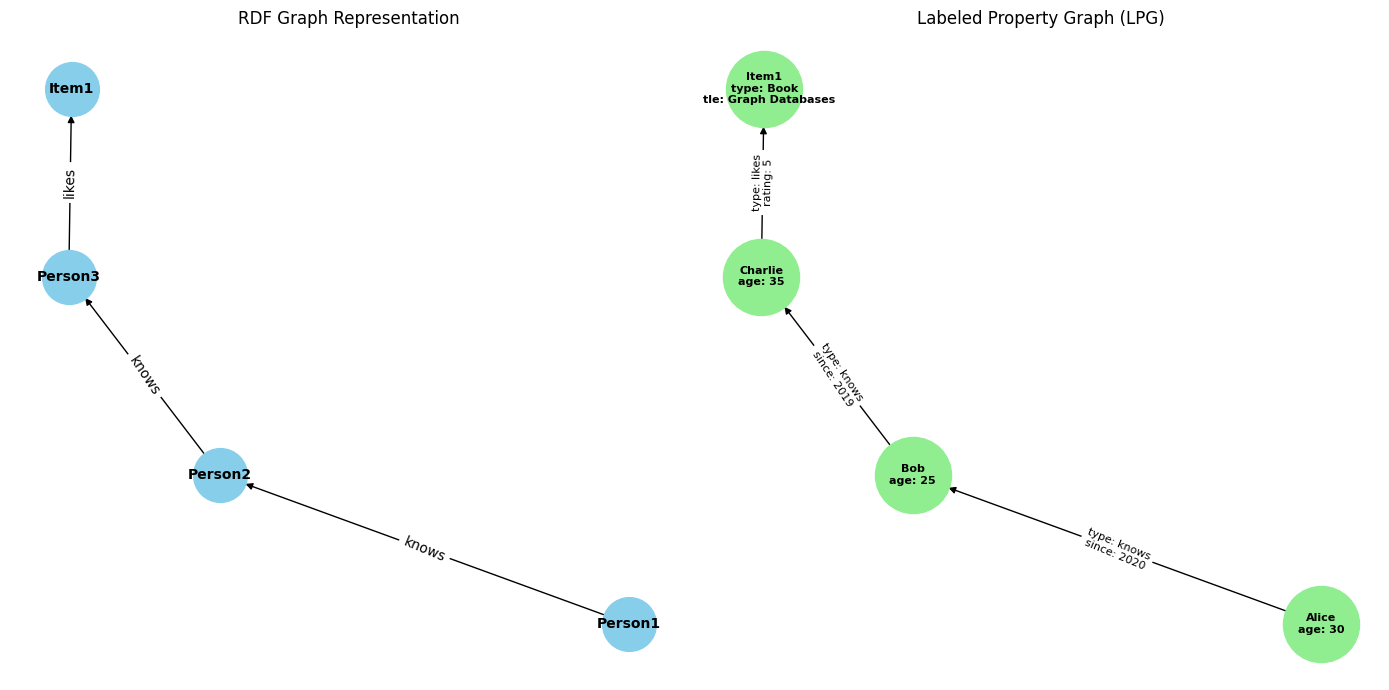

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create RDF graph (as triples)
rdf_graph = nx.DiGraph()
rdf_triples = [("Person1", "knows", "Person2"), 
               ("Person2", "knows", "Person3"),
               ("Person3", "likes", "Item1")]
rdf_graph.add_edges_from([(s, o) for s, p, o in rdf_triples])

# Create LPG graph
lpg_graph = nx.DiGraph()
lpg_graph.add_node("Person1", name="Alice", age=30)
lpg_graph.add_node("Person2", name="Bob", age=25)
lpg_graph.add_node("Person3", name="Charlie", age=35)
lpg_graph.add_node("Item1", type="Book", title="Graph Databases")
lpg_graph.add_edge("Person1", "Person2", type="knows", since="2020")
lpg_graph.add_edge("Person2", "Person3", type="knows", since="2019")
lpg_graph.add_edge("Person3", "Item1", type="likes", rating=5)

# Helper function to format node labels with properties
def format_node_label(node, attrs):
    label = f"{attrs.get('name', node)}\n"
    label += "\n".join([f"{key}: {value}" for key, value in attrs.items() if key != 'name'])
    return label

# Helper function to format edge labels with properties
def format_edge_label(attrs):
    return "\n".join([f"{key}: {value}" for key, value in attrs.items()])

# Draw RDF Graph
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(rdf_graph, seed=42)
nx.draw(rdf_graph, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(rdf_graph, pos, edge_labels={(s, o): p for s, p, o in rdf_triples})
plt.title("RDF Graph Representation")

# Draw LPG Graph with node and edge properties
plt.subplot(1, 2, 2)
pos = nx.spring_layout(lpg_graph, seed=42)
node_labels = {node: format_node_label(node, attrs) for node, attrs in lpg_graph.nodes(data=True)}
edge_labels = {(u, v): format_edge_label(attrs) for u, v, attrs in lpg_graph.edges(data=True)}

nx.draw(lpg_graph, pos, labels=node_labels, with_labels=True, node_size=3000, node_color='lightgreen', font_size=8, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(lpg_graph, pos, edge_labels=edge_labels, font_size=8)
plt.title("Labeled Property Graph (LPG)")

plt.tight_layout()
plt.show()


### Connection to Previous Concepts:

- **Directed and Weighted Graphs:** Both RDF and LPG can represent directed relationships. LPG can additionally represent weighted edges directly, similar to what we've seen in weighted graphs.
- **Heterogeneous vs. Homogeneous:** LPGs are naturally heterogeneous with diverse node and edge types, while RDF typically handles data with uniform structures but links various datasets through semantics.
- **Dynamic and Evolving Data:** LPGs are more adept at handling dynamic graphs with evolving structures, aligning with the concepts discussed in dynamic graphs.



## 1. Node-Level Prediction
- **Objective**: Predict properties or labels of individual nodes within a graph.
- **Examples**:
  - Predicting the category of a webpage in a web graph.
  - Classifying proteins in a protein interaction network.


# Prediction Tasks in Graphs

<img src="./img/graph-tasks.png" alt="Graph Tasks" style="width: 100%; margin-top: 15px;">


## 2. Link-Level Prediction
- **Objective**: Predict the existence or properties of links (edges) between nodes.
- **Examples**:
  - Predicting friendships in social networks (link prediction).
  - Recommending products in e-commerce through connections between users and products.



## 3. Graph and Sub-Graph Prediction
- **Objective**: Predict properties or labels of entire graphs or sub-graphs.
- **Examples**:
  - Classifying molecules as toxic or non-toxic in chemical graphs.
  - Identifying types of communities in social networks.



# Traditional ML Pipeline

## Design Features for Nodes, Links, and Graphs

Machine learning on graphs involves designing features for nodes, links, and the entire graph. These features can be categorized into two main types:


1. **Attribute Features**: 
   - These are features directly associated with the nodes or edges in the graph.
   - Examples include:
     - **Node Attributes**: Age of a person in a social network, type of item in a product graph.
     - **Edge Attributes**: Weight of a link (e.g., distance, strength of interaction).
   

2. **Structural Features**:
   - These are features derived from the graph's structure.
   - Examples include:
     - **Node Structural Features**: Degree (number of connections), centrality measures (e.g., PageRank), clustering coefficient.
     - **Graph Structural Features**: Graph density, diameter, or motifs.

### Characterizing Node Position and Structure in Networks

**Goal:** Characterize the structure and position of a node in the network:

- **Node Degree:** 
  - Measure the number of connections a node has within the network.
  
- **Node Importance & Position:**
  - Evaluate a node's significance based on its role or location in the network.
  - **Examples:**
    - Number of shortest paths passing through a node.
    - Average shortest path length to other nodes.

- **Substructures Around the Node:**
  - Analyze the local network topology, such as cliques, motifs, or other substructures surrounding the node.

# Traditional ML Pipeline

## Training and Applying an ML Model

In a traditional machine learning pipeline, the process involves two key steps: training a model and applying it for predictions.



### 1. Train an ML Model:

- **Objective**: Use feature vectors $x_1, x_2, \ldots, x_n$ to train a machine learning model to predict corresponding outputs $y_1, y_2, \ldots, y_n$.
- **Common Algorithms**:
  - **Random Forest**: A collection of decision trees that aggregate their predictions.
  - **Support Vector Machine (SVM)**: A model that finds the optimal hyperplane to separate classes.
  - **Neural Network**: A model that uses layers of neurons to learn complex patterns.

**Illustration**:
$$
\begin{align*}
x_1 & \rightarrow y_1 \\
x_2 & \rightarrow y_2 \\
\vdots & \\
x_n & \rightarrow y_n \\
\end{align*}
$$



### 2. Apply the Model:

- **Objective**: Use the trained model to make predictions on new data.
- **Process**:
  - For a new node, link, or graph, extract its feature vector $x$.
  - Use the trained model to predict the output $y$.

**Illustration**:
$$
x \rightarrow y
$$



### Example:

- **Training**: Given a set of nodes in a graph with feature vectors like age, degree, etc., the model learns to predict whether a node belongs to a certain community.
- **Application**: For a new node, the model uses its feature vector to predict its community membership.

# This Lecture: Feature Design

- **Using effective features over graphs is the key to achieving good test performance.**
- The traditional ML pipeline uses **hand-designed features**.
- In this lecture, we overview the traditional features for:
  - **Node-level prediction**
  - **Link-level prediction**
  - **Graph-level prediction**
- For simplicity, we focus on **undirected graphs**.

# Machine Learning in Graphs

**Goal:** Make predictions for a set of objects.

**Design choices:**
- **Features:** \(d\)-dimensional vectors
- **Objects:** Nodes, edges, sets of nodes, entire graphs
- **Objective function:**
  - What task are we aiming to solve?

# Machine Learning in Graphs

**Machine learning in graphs:**
- **Given:** $G = (V, E)$
- **Learn a function:** $f : V \to \mathbb{R}$

**Question:**  
How do we learn the function?

<left><img width=25% src="img/gw_monogram_2c.png"></left>


# Part 2: Node-Level Features and Tasks



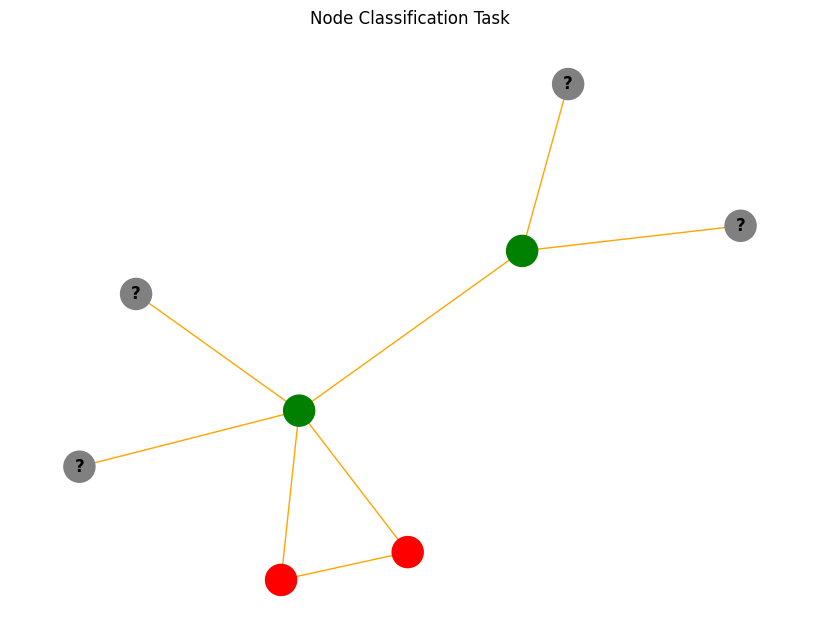

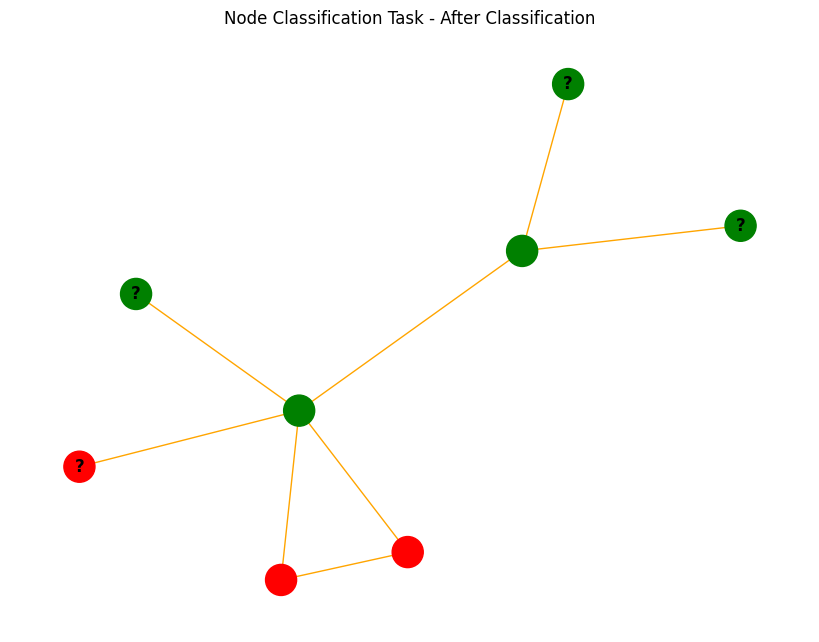

In [7]:
# Create a graph
G = nx.Graph()

# Add nodes with attributes for classification task simulation
# Green: classified, Red: classified, Grey: unclassified
nodes = [
    (1, {'color': 'grey', 'label': '?'}),
    (2, {'color': 'grey', 'label': '?'}),
    (3, {'color': 'grey', 'label': '?'}),
    (4, {'color': 'grey', 'label': '?'}),
    (5, {'color': 'green', 'label': ''}),
    (6, {'color': 'green', 'label': ''}),
    (7, {'color': 'red', 'label': ''}),
    (8, {'color': 'red', 'label': ''}),
]

# Adding nodes to the graph
G.add_nodes_from(nodes)

# Add edges
edges = [(1, 5), (2, 5), (3, 6), (4, 6), (5, 6), (6, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Define node colors based on the initial attribute
node_colors = [data['color'] for _, data in G.nodes(data=True)]
node_labels = {node: data['label'] for node, data in G.nodes(data=True)}

# Plotting the initial graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(
    G, pos, with_labels=True, labels=node_labels, node_color=node_colors, 
    node_size=500, font_size=12, font_color='black', font_weight='bold', edge_color='orange'
)
plt.title("Node Classification Task")
plt.show()

# Updated node colors after classification
# Assuming classification assigns green or red randomly to previous grey nodes
classified_node_colors = ['green', 'green', 'red', 'green', 'green', 'green', 'red', 'red']

# Plotting the updated graph to reflect classification
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, labels=node_labels, node_color=classified_node_colors,
    node_size=500, font_size=12, font_color='black', font_weight='bold', edge_color='orange'
)
plt.title("Node Classification Task - After Classification")
plt.show()

# Node-Level Features: Overview

**Goal:** Characterize the structure and position of a node in the network:
- **Node degree**: Measures the number of connections a node has.
- **Node centrality**: Identifies the most important nodes within the graph.
- **Clustering coefficient**: Measures the degree to which nodes in a graph tend to cluster together.
- **Graphlets**: Small subgraph patterns that capture local structures around nodes.

# Node Degree

**Node Degree:**  
The node degree is a basic measure of the connectivity of a node within a graph. It is defined as the number of edges connected to the node. In an undirected graph, it is simply the count of all connections (edges) a node has.

- **Importance:** Node degree helps identify how influential or well-connected a node is within the graph. Nodes with high degrees are often central or influential in the network.
- **Application:** Used in network analysis to identify key nodes, assess network robustness, and more.

**Formula:**
For a node $(v)$, the degree $(d(v)$) is given by:

$$
d(v) = \sum_{u \in V} A_{vu}
$$

where $(A_{vu})$ is the adjacency matrix element that is 1 if there is an edge between nodes \(v\) and \(u\), otherwise 0.

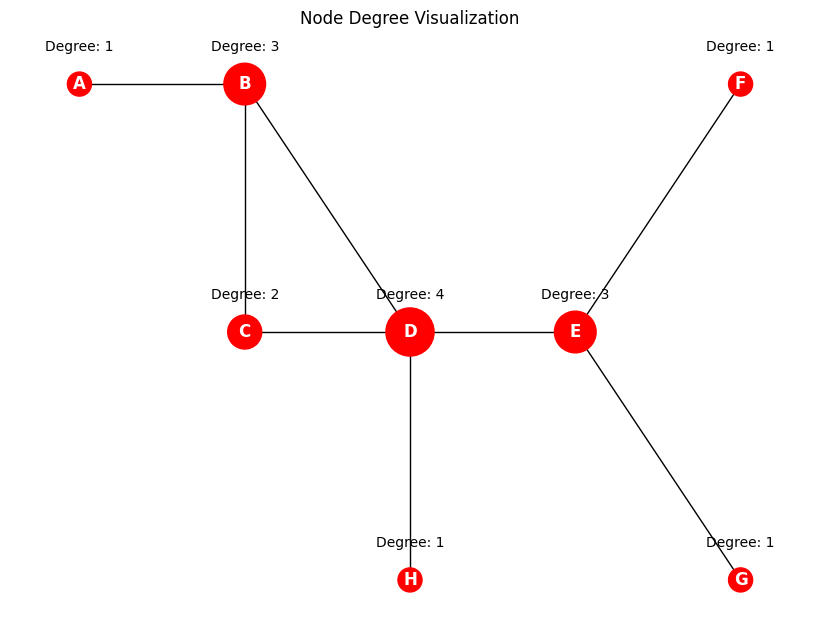

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph with nodes and edges
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(nodes)

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), 
         ('E', 'F'), ('E', 'G'), ('D', 'H')]
G.add_edges_from(edges)

# Calculate node degrees
node_degrees = dict(G.degree())

# Define positions of the nodes for the plot
pos = {
    'A': (0, 2), 'B': (1, 2), 'C': (1, 1), 'D': (2, 1), 
    'E': (3, 1), 'F': (4, 2), 'G': (4, 0), 'H': (2, 0)
}

# Draw the graph, highlighting the node degrees
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='red', 
        node_size=[v * 300 for v in node_degrees.values()],
        font_weight='bold', font_color='white')

# Display node degree as labels with offset for better visibility
# Adjust label positions by adding a small offset
label_pos = {k: (v[0], v[1] + 0.15) for k, v in pos.items()}
degree_labels = {node: f'Degree: {deg}' for node, deg in node_degrees.items()}
nx.draw_networkx_labels(G, label_pos, labels=degree_labels, font_color='black', font_size=10)

plt.title("Node Degree Visualization")
plt.show()

# Node Features: Node Centrality

- **Node degree** counts the neighboring nodes **without capturing their importance**.
- **Node centrality** $c_v$ takes the **node importance in a graph** into account.

**Different ways to model importance:**
- **Eigenvector centrality**: Measures a node's influence based on the importance of its neighbors.
- **PageRank**: Calculates a node's importance by considering the importance of nodes linking to it, widely used in ranking web pages.
- **Betweenness centrality**: Quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.
- **Closeness centrality**: Represents how close a node is to all other nodes in the graph.
- **And some others...**

**Key Idea:**  
Centrality measures provide insight into the relative importance of a node within the network, which is crucial for tasks like identifying influential nodes, optimizing network flow, and understanding the structural properties of the graph.

# Node Features: Eigenvector Centrality

**Eigenvector Centrality:**
- Eigenvector centrality measures the influence of a node in a network by considering the importance of its neighbors. A node connected to high-centrality nodes will have a higher eigenvector centrality itself.

**Formula:**
For a node $v$, its eigenvector centrality $x_v$ is given by:

$$
x_v = \frac{1}{\lambda} \sum_{u \in V} A_{vu} x_u
$$

where:
- $A_{vu}$ is the adjacency matrix element indicating the connection between nodes $v$ and $u$.
- $x_u$ is the centrality score of node $u$.
- $\lambda$ is the largest eigenvalue of the adjacency matrix.

**Use Case:**
- **Identifying Influencers in Social Networks:** In social media platforms, eigenvector centrality can help identify not just users who have many connections, but those who are connected to other well-connected users, making them highly influential in spreading information.

**Example Visualization:**
Below is an example of a small graph where nodes are visualized based on their eigenvector centrality.

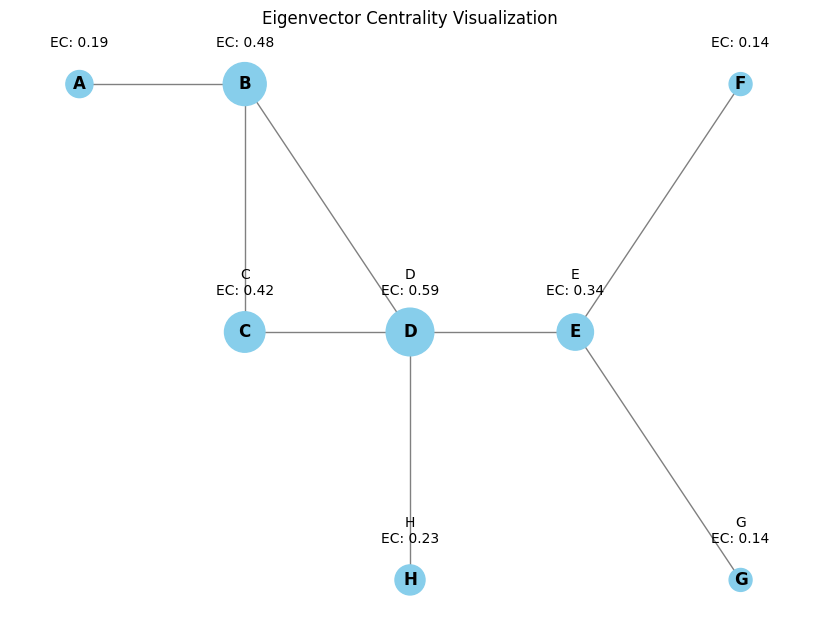

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph with nodes and edges
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(nodes)

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), 
         ('E', 'F'), ('E', 'G'), ('D', 'H')]
G.add_edges_from(edges)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Define positions of the nodes for the plot
pos = {
    'A': (0, 2), 'B': (1, 2), 'C': (1, 1), 'D': (2, 1), 
    'E': (3, 1), 'F': (4, 2), 'G': (4, 0), 'H': (2, 0)
}

# Draw the graph, highlighting the eigenvector centrality
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', 
        node_size=[v * 2000 for v in eigenvector_centrality.values()],
        font_weight='bold', font_color='black', edge_color='gray')

# Display eigenvector centrality as labels with offset for better visibility
label_pos = {k: (v[0], v[1] + 0.2) for k, v in pos.items()}  # Adjusted for better readability
centrality_labels = {node: f'{node}\nEC: {eigenvector_centrality[node]:.2f}' for node in eigenvector_centrality}
nx.draw_networkx_labels(G, label_pos, labels=centrality_labels, font_color='black', font_size=10)

plt.title("Eigenvector Centrality Visualization")
plt.show()

# Node Features: PageRank

**PageRank:**
- PageRank is an algorithm developed by Google to rank web pages in search results. It measures the importance of each node in a graph based on the quantity and quality of links pointing to it, considering that important nodes are more likely to receive links from other important nodes.

**Formula:**
For a node $v$, the PageRank $PR(v)$ is given by:

$$
PR(v) = \frac{1 - d}{N} + d \sum_{u \in \text{in-neighbors}(v)} \frac{PR(u)}{\text{out-degree}(u)}
$$

where:
- $d$ is the damping factor.
- $N$ is the total number of nodes.
- The sum is over all nodes $u$ that link to $v$.

**Comparison with Eigenvector Centrality:**
- **Similarity:** Both PageRank and Eigenvector Centrality evaluate node importance based on connections to other important nodes.
- **Differences:**
  - **Eigenvector Centrality** treats all connections equally and is typically used in undirected graphs.
  - **PageRank** adds a damping factor and considers directionality, making it well-suited for directed networks like the web.
- **Use Case:**
  - **Eigenvector Centrality:** Used in social networks to find influential people.
  - **PageRank:** Used extensively in web search engines to rank pages.

**Example Visualization:**
Below is an example comparing Eigenvector Centrality and PageRank in a directed graph.

/Users/amehrabi/miniconda3/envs/gwu/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/amehrabi/miniconda3/envs/gwu/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:767: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


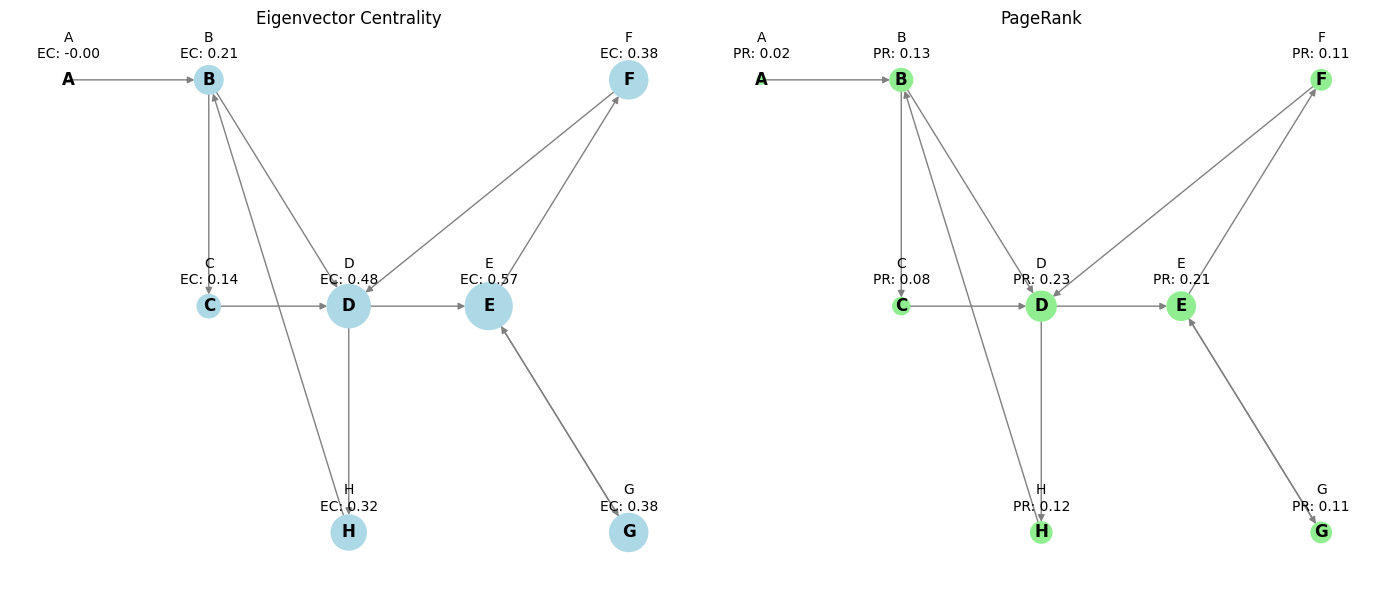

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph with nodes and edges
G = nx.DiGraph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(nodes)

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), 
         ('E', 'F'), ('E', 'G'), ('D', 'H'), ('H', 'B'), ('F', 'D'), ('G', 'E')]
G.add_edges_from(edges)

# Calculate eigenvector centrality and PageRank
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
pagerank = nx.pagerank(G, alpha=0.85)

# Define positions of the nodes for the plot
pos = {
    'A': (0, 2), 'B': (1, 2), 'C': (1, 1), 'D': (2, 1), 
    'E': (3, 1), 'F': (4, 2), 'G': (4, 0), 'H': (2, 0)
}

# Draw the graph
plt.figure(figsize=(14, 6))

# Visualization for Eigenvector Centrality
plt.subplot(1, 2, 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=[v * 2000 for v in eigenvector_centrality.values()],
        font_weight='bold', font_color='black', edge_color='gray')
centrality_labels = {node: f'{node}\nEC: {eigenvector_centrality[node]:.2f}' for node in eigenvector_centrality}
nx.draw_networkx_labels(G, {k: (v[0], v[1] + 0.15) for k, v in pos.items()}, 
                        labels=centrality_labels, font_color='black', font_size=10)
plt.title("Eigenvector Centrality")

# Visualization for PageRank
plt.subplot(1, 2, 2)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', 
        node_size=[v * 2000 for v in pagerank.values()],
        font_weight='bold', font_color='black', edge_color='gray')
pagerank_labels = {node: f'{node}\nPR: {pagerank[node]:.2f}' for node in pagerank}
nx.draw_networkx_labels(G, {k: (v[0], v[1] + 0.15) for k, v in pos.items()}, 
                        labels=pagerank_labels, font_color='black', font_size=10)
plt.title("PageRank")

plt.tight_layout()
plt.show()

# Node Features: Betweenness Centrality

**Betweenness Centrality:**
- Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes. It quantifies the influence a node has over the flow of information in the network by acting as a bridge between other nodes.

**Formula:**
For a node $v$, the betweenness centrality $C_B(v)$ is given by:

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

where:
- $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$.
- $\sigma_{st}(v)$ is the number of those paths that pass through $v$.

**Use Case:**
- **Network Traffic Optimization:** In transportation or communication networks, betweenness centrality identifies key routes or nodes that manage a significant portion of the traffic or information flow. For example, identifying critical roads in a city's traffic network can help prioritize infrastructure improvements.

**Example Visualization:**
Below is an example of a small graph where nodes are visualized based on their betweenness centrality.

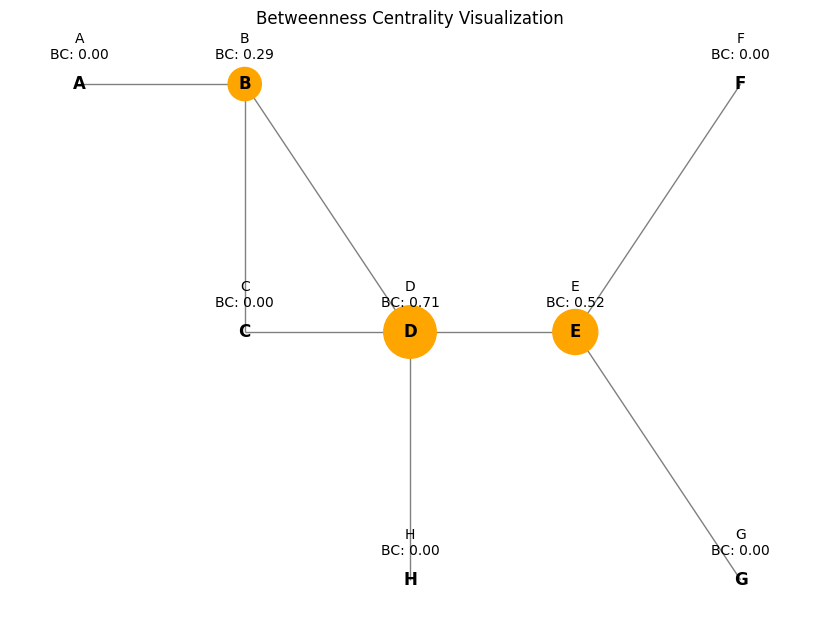

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph with nodes and edges
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(nodes)

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), 
         ('E', 'F'), ('E', 'G'), ('D', 'H')]
G.add_edges_from(edges)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Define positions of the nodes for the plot
pos = {
    'A': (0, 2), 'B': (1, 2), 'C': (1, 1), 'D': (2, 1), 
    'E': (3, 1), 'F': (4, 2), 'G': (4, 0), 'H': (2, 0)
}

# Draw the graph, highlighting the betweenness centrality
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='orange', 
        node_size=[v * 2000 for v in betweenness_centrality.values()],
        font_weight='bold', font_color='black', edge_color='gray')

# Display betweenness centrality as labels with offset for better visibility
label_pos = {k: (v[0], v[1] + 0.15) for k, v in pos.items()}
centrality_labels = {node: f'{node}\nBC: {betweenness_centrality[node]:.2f}' for node in betweenness_centrality}
nx.draw_networkx_labels(G, label_pos, labels=centrality_labels, font_color='black', font_size=10)

plt.title("Betweenness Centrality Visualization")
plt.show()

# Node Features: Closeness Centrality

**Closeness Centrality:**
- Closeness centrality measures how close a node is to all other nodes in the graph. It is the inverse of the sum of the shortest path distances from the node to all other nodes, indicating how quickly information can spread from that node throughout the graph.

**Formula:**
For a node $v$, the closeness centrality $C_C(v)$ is given by:

$$
C_C(v) = \frac{1}{\sum_{t \in V} d(v, t)}
$$

where:
- $d(v, t)$ is the shortest path distance between node $v$ and node $t$.
- The sum is taken over all nodes $t$ in the graph.

**Use Case:**
- **Efficient Communication:** In organizational or communication networks, nodes with high closeness centrality can efficiently spread information to others. For example, identifying key personnel in a company who can effectively disseminate information across departments.

**Example Visualization:**
Below is an example of a small graph where nodes are visualized based on their closeness centrality.

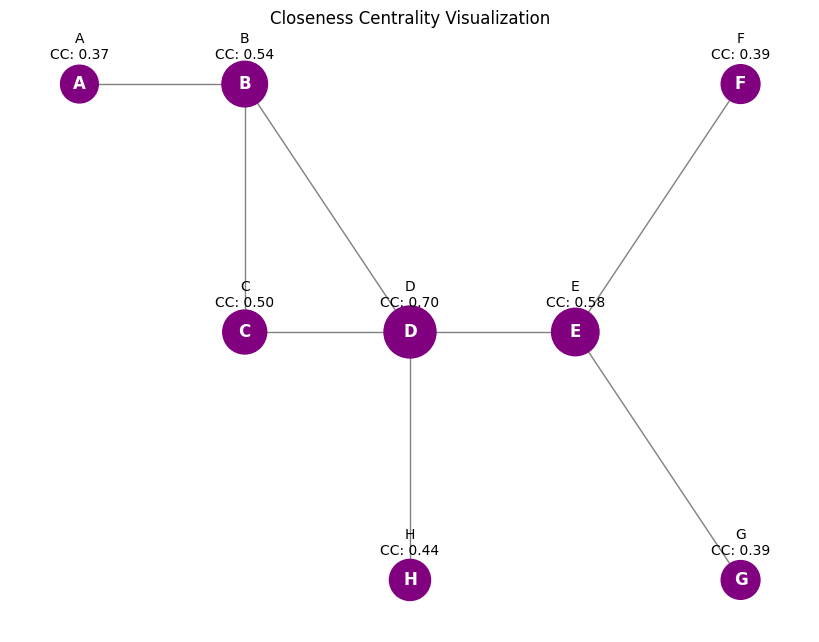

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph with nodes and edges
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(nodes)

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), 
         ('E', 'F'), ('E', 'G'), ('D', 'H')]
G.add_edges_from(edges)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Define positions of the nodes for the plot
pos = {
    'A': (0, 2), 'B': (1, 2), 'C': (1, 1), 'D': (2, 1), 
    'E': (3, 1), 'F': (4, 2), 'G': (4, 0), 'H': (2, 0)
}

# Draw the graph, highlighting the closeness centrality
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='purple', 
        node_size=[v * 2000 for v in closeness_centrality.values()],
        font_weight='bold', font_color='white', edge_color='gray')

# Display closeness centrality as labels with offset for better visibility
label_pos = {k: (v[0], v[1] + 0.15) for k, v in pos.items()}
centrality_labels = {node: f'{node}\nCC: {closeness_centrality[node]:.2f}' for node in closeness_centrality}
nx.draw_networkx_labels(G, label_pos, labels=centrality_labels, font_color='black', font_size=10)

plt.title("Closeness Centrality Visualization")
plt.show()

# Node Features: Clustering Coefficient

**Clustering Coefficient:**
- The clustering coefficient of a node measures how connected the node's neighbors are to each other, essentially capturing the local structure around the node. It indicates the likelihood that a node's neighbors are also connected to each other, forming a triangle.

**Formula:**
For a node $v$, the clustering coefficient $e_v$ is given by:

$$
e_v = \frac{\#(\text{edges among neighboring nodes})}{\binom{k_v}{2}}
$$

where:
- The numerator counts the actual number of edges between the neighboring nodes of $v$.
- The denominator $\binom{k_v}{2}$ represents the total number of possible edges between the $k_v$ neighbors of node $v$.

The clustering coefficient $e_v$ ranges between 0 and 1:
- $e_v = 1$: All neighbors of $v$ are connected (forming a complete clique).
- $e_v = 0$: None of the neighbors of $v$ are connected.

**Importance:**
- The clustering coefficient helps to understand the local connectivity or clustering of a node within a graph, which is crucial for analyzing community structures, redundancy, and robustness of networks.

**Examples:**
- If $e_v = 1$, the node's neighbors form a complete graph.
- If $e_v = 0.5$, half of the possible edges between neighbors exist.
- If $e_v = 0$, no edges exist between neighbors.

Below are example illustrations showing various clustering coefficients for a node:

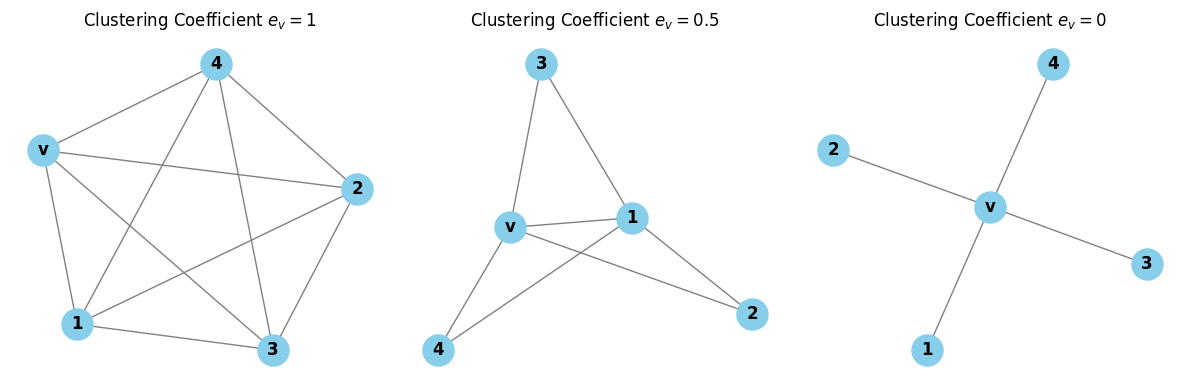

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph with nodes and edges
G = nx.Graph()

# Add nodes
nodes = ['v', '1', '2', '3', '4']
G.add_nodes_from(nodes)

# Define three different example graphs to represent different clustering coefficients
examples = [
    ([(('v', '1'), ('v', '2'), ('v', '3'), ('v', '4'), ('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('2', '4'), ('3', '4'))], 1),  # Fully connected neighbors
    ([(('v', '1'), ('v', '2'), ('v', '3'), ('v', '4'), ('1', '2'), ('1', '3'), ('1', '4'))], 0.5),  # Partially connected neighbors
    ([(('v', '1'), ('v', '2'), ('v', '3'), ('v', '4'))], 0)  # No connections among neighbors
]

plt.figure(figsize=(12, 4))

for i, (edges, coefficient) in enumerate(examples):
    G.clear_edges()  # Clear previous edges
    G.add_edges_from(edges[0])
    pos = nx.spring_layout(G)
    
    plt.subplot(1, 3, i + 1)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', 
            node_size=500, font_weight='bold', font_color='black', edge_color='gray')
    plt.title(f'Clustering Coefficient $e_v = {coefficient}$')

plt.tight_layout()
plt.show()

# Node Features: Graphlets

**Graphlets:**
- Graphlets are small, connected, non-isomorphic subgraphs used to capture the local structure around a node. They extend the concept of clustering by considering various patterns beyond triangles, such as different types of subgraph motifs.

**Observation:**
- The clustering coefficient specifically counts the number of triangles in a node's ego-network, which is a limited view of the local structure.

**Formula for Clustering Coefficient:**
For a node $v$, the clustering coefficient $e_v$ is given by:

$$
e_v = \frac{\text{#(triangles in the ego-network)}}{\binom{k_v}{2}}
$$

**Examples:**
- In the ego-network of a node $v$, clustering coefficient counts only triangles.
- For more comprehensive analysis, graphlets generalize this by counting other subgraphs like paths, stars, and cycles.

**Comparison with Clustering Coefficient:**
- **Clustering Coefficient** focuses solely on triangles, providing a measure of local density but missing other structural nuances.
- **Graphlets** allow for a more detailed analysis by counting a variety of subgraph patterns, offering a richer description of the local neighborhood of a node.

**Use Case:**
- **Graphlets** are used in network analysis to identify nodes with similar local structures, support graph isomorphism detection, and analyze complex networks like biological or social networks.

**Example Visualization:**
Below are examples illustrating how different graphlets, including triangles, are identified within a node's ego-network:

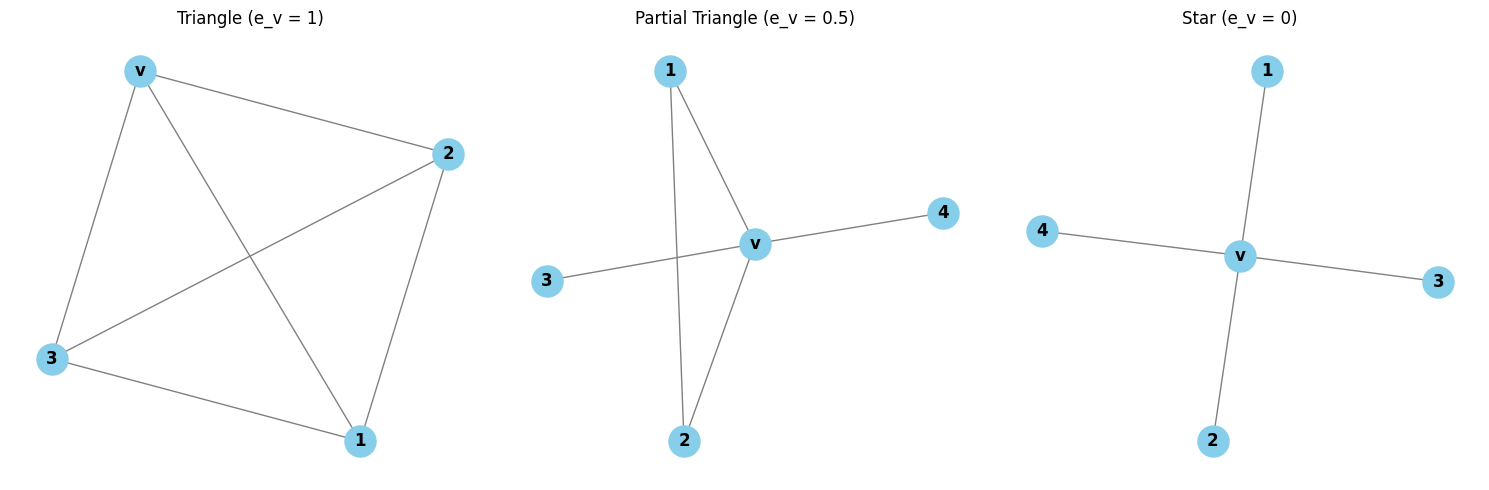

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graphs to demonstrate different graphlets
G1 = nx.Graph()
G1.add_edges_from([('v', '1'), ('v', '2'), ('v', '3'), ('1', '2'), ('1', '3'), ('2', '3')])  # Triangle Graphlet

G2 = nx.Graph()
G2.add_edges_from([('v', '1'), ('v', '2'), ('v', '3'), ('1', '2'), ('v', '4')])  # Path with Triangle

G3 = nx.Graph()
G3.add_edges_from([('v', '1'), ('v', '2'), ('v', '3'), ('v', '4')])  # Star Graphlet (No triangles)

graphs = [G1, G2, G3]
titles = ['Triangle (e_v = 1)', 'Partial Triangle (e_v = 0.5)', 'Star (e_v = 0)']

plt.figure(figsize=(15, 5))

for i, (graph, title) in enumerate(zip(graphs, titles)):
    pos = nx.spring_layout(graph)
    plt.subplot(1, 3, i + 1)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', 
            node_size=500, font_weight='bold', font_color='black', edge_color='gray')
    plt.title(title)

plt.tight_layout()
plt.show()

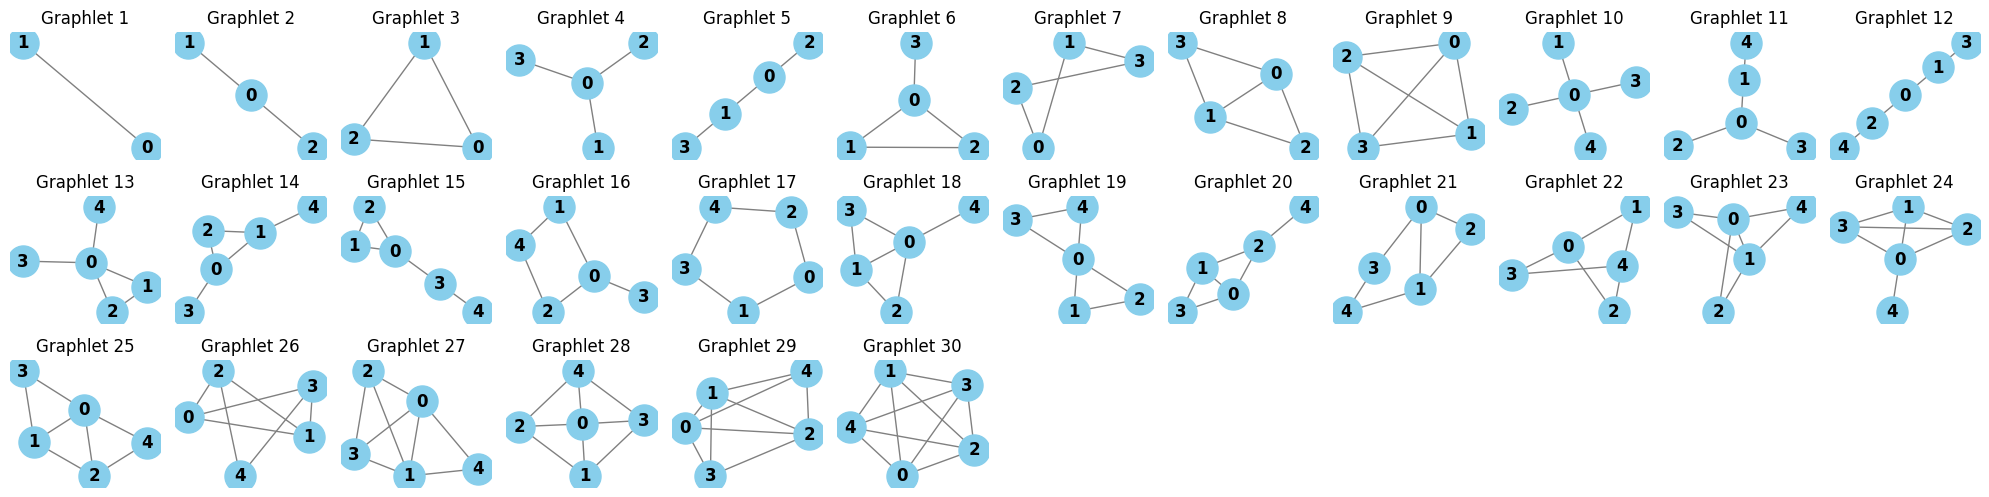

Total graphlets generated: 30


In [15]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations

# Function to generate all unique graphlets up to n nodes
def generate_graphlets(n):
    graphlets = []
    # Iterate over possible sizes from 2 to n nodes
    for nodes in range(2, n + 1):
        # Generate combinations of node connections (edges)
        for edges in range(1, nodes * (nodes - 1) // 2 + 1):
            base_graph = nx.Graph()
            base_graph.add_nodes_from(range(nodes))
            possible_edges = list(combinations(range(nodes), 2))
            # Iterate over combinations of edges
            for edge_combination in combinations(possible_edges, edges):
                graph = base_graph.copy()
                graph.add_edges_from(edge_combination)
                # Filter out non-connected or isomorphic graphs
                if nx.is_connected(graph) and not any(nx.is_isomorphic(graph, g) for g in graphlets):
                    graphlets.append(graph)
    return graphlets

# Generate all graphlets up to 5 nodes
graphlets = generate_graphlets(5)

# Visualize the graphlets
plt.figure(figsize=(20, 10))
num_graphlets = len(graphlets)

# Adjust to visualize up to 72 positions
for i, graphlet in enumerate(graphlets[:72]):
    plt.subplot(6, 12, i + 1)  # Adjusting grid size to fit visualization
    pos = nx.spring_layout(graphlet)
    nx.draw(graphlet, pos, with_labels=True, node_color='skyblue', 
            node_size=500, font_weight='bold', font_color='black', edge_color='gray')
    plt.title(f'Graphlet {i + 1}')

plt.tight_layout()
plt.show()

# Print the count of graphlets generated
print(f"Total graphlets generated: {num_graphlets}")

# Node Features: Graphlets

- **Graphlet Degree Vector (GDV):** Graphlet-based features for nodes. Counts the number of graphlets a node touches.
  
- **Degree:** Counts the number of edges a node touches.

- **Clustering Coefficient:** Counts the number of triangles a node is part of.

# Node Features: Graphlets

- **For instance graphlets** up to 5 nodes provide a signature of a node's topology:
  - A **vector of 73 coordinates** describes the topology of a node's neighborhood.
  - This vector captures interconnectivities out to a **distance of 4 hops**.

- **Graphlet Degree Vector**:
  - Measures a node’s **local network topology**.
  - Comparing vectors of two nodes offers a more detailed measure of local topological similarity than traditional metrics such as node degrees or clustering coefficient.

# Node-Level Feature: Summary

- **Different methods have been introduced to obtain node features.**
- Node features can be categorized into two main types:



  - **Importance-based features:**
    - Node degree
    - Different node centrality measures

 - **Structure-based features:**
    - Node degree
    - Clustering coefficient
    - Graphlet count vector

# Node-Level Feature: Summary

- **Importance-based features:** Capture the importance of a node within a graph.
  
  - **Node degree:**
    - Counts the number of neighboring nodes.
  
  - **Node centrality:**
    - Models the importance of neighboring nodes in a graph.
    - Includes various measures, such as:
      - **Eigenvector centrality**
      - **Betweenness centrality**
      - **Closeness centrality**

- **Applications:**
  - Useful for predicting influential nodes in a graph.
  - **Example:** Predicting celebrity users in a social network.

# Node-Level Feature: Summary

- **Structure-based features:** Capture topological properties of the local neighborhood around a node.

  - **Node degree:**
    - Counts the number of neighboring nodes.
  
  - **Clustering coefficient:**
    - Measures how connected neighboring nodes are.
  
  - **Graphlet degree vector:**
    - Counts the occurrences of different graphlets.

- **Applications:**
  - Useful for predicting the specific role a node plays within a graph.
  - **Example:** Predicting protein functionality in a protein-protein interaction network.

<left><img width=25% src="img/gw_monogram_2c.png"></left>


# Part 3: Link-Level Features and Tasks



# Link-Level Prediction Task: Recap

- **Objective:** Predict new links based on existing links in the graph.
  
- **Approach:**
  - At test time, consider all possible node pairs (excluding existing links).
  - Rank these pairs and predict the top \( K \) node pairs as potential new links.

- **Key Insight:**
  - The crucial aspect is designing effective features for each **pair of nodes** to accurately predict the likelihood of a new link.


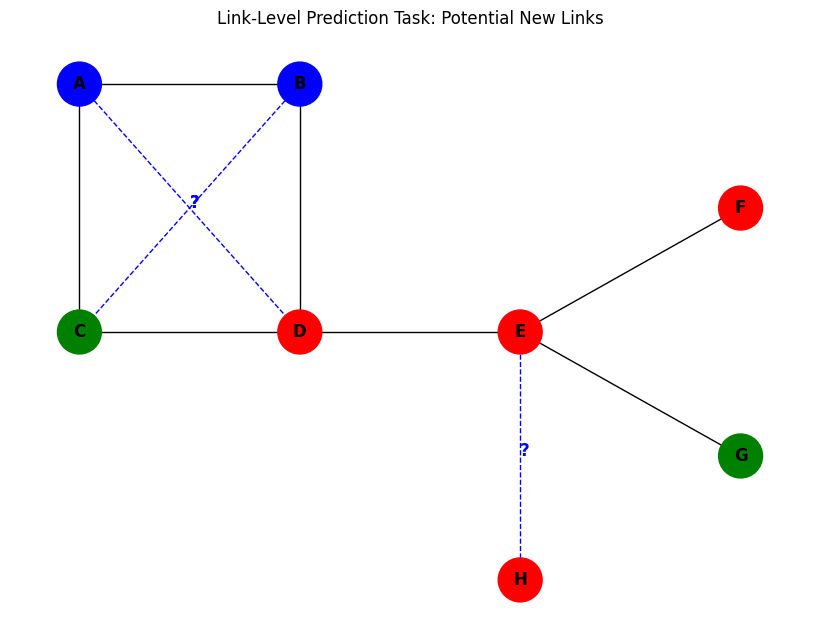

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(nodes)

# Add existing edges
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('E', 'G')]
G.add_edges_from(edges)

# Define positions for nodes
pos = {
    'A': (0, 2),
    'B': (2, 2),
    'C': (0, 0),
    'D': (2, 0),
    'E': (4, 0),
    'F': (6, 1),
    'G': (6, -1),
    'H': (4, -2)
}

# Define colors for each node
node_colors = ['blue', 'blue', 'green', 'red', 'red', 'red', 'green', 'red']

# Draw the nodes and edges
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, edge_color='black', 
    node_size=1000, font_size=12, font_weight='bold'
)

# Highlight the potential new links with dashed lines
potential_edges = [('A', 'D'), ('B', 'C'), ('E', 'H')]
nx.draw_networkx_edges(G, pos, edgelist=potential_edges, style='dashed', edge_color='blue')

# Add annotations for potential links
for edge in potential_edges:
    mid_point = [(pos[edge[0]][0] + pos[edge[1]][0]) / 2, (pos[edge[0]][1] + pos[edge[1]][1]) / 2]
    plt.text(mid_point[0], mid_point[1], "?", fontsize=12, color='blue', fontweight='bold')

plt.title("Link-Level Prediction Task: Potential New Links")
plt.show()

# Link Prediction as a Task

## Two Formulations of the Link Prediction Task:


1. **Links Missing at Random:**
   - Randomly remove a set of links from the graph.
   - The goal is to predict the missing links.



2. **Links Over Time:**
   - Given a graph $G[t_0, t_0']$ with edges observed up to time $t_0'$:
     - **Objective:** Output a ranked list $L$ of links that are not present in $G[t_0, t_0']$ but are predicted to appear in $G[t_1, t_1']$.

## Evaluation:

- Let $n = |E_{\text{new}}|$ represent the number of new edges that appear during the test period $[t_1, t_1']$.
- Evaluate by taking the top $n$ elements from the ranked list $L$ and counting the correctly predicted edges.

# Link Prediction via Proximity

## Methodology:

- For each pair of nodes $(x, y)$, compute a score $c(x, y)$:
  - Example: $c(x, y)$ could represent the number of common neighbors between $x$ and $y$.
  
- Sort pairs $(x, y)$ by their scores $c(x, y)$ in decreasing order.

- **Predict** the top $n$ pairs as new links.

- **Evaluate** by checking which of these predicted links actually appear in $G[t_1, t_1']$.

# Link-Level Features: Overview

- **Distance-based feature:**
  - Measures the shortest path or proximity between nodes in the graph.

- **Local neighborhood overlap:**
  - Quantifies the overlap or similarity of the immediate neighbors of two nodes.

- **Global neighborhood overlap:**
  - Extends the concept of overlap to a broader or more global context within the graph, considering a wider scope of connections.

# Distance-Based Features

## Shortest-Path Distance Between Two Nodes

- **Example:**
  - Shortest-path distances between pairs of nodes:
    - $S_{BH} = S_{BE} = S_{AB} = 2$
    - $S_{BG} = S_{BF} = 3$

- **Limitation:**
  - Shortest-path distance does not capture the degree of neighborhood overlap.
  
- **Illustration:**
  - Node pair $(B, H)$ has 2 shared neighboring nodes.
  - Node pairs $(B, E)$ and $(A, B)$ have only 1 shared neighboring node.

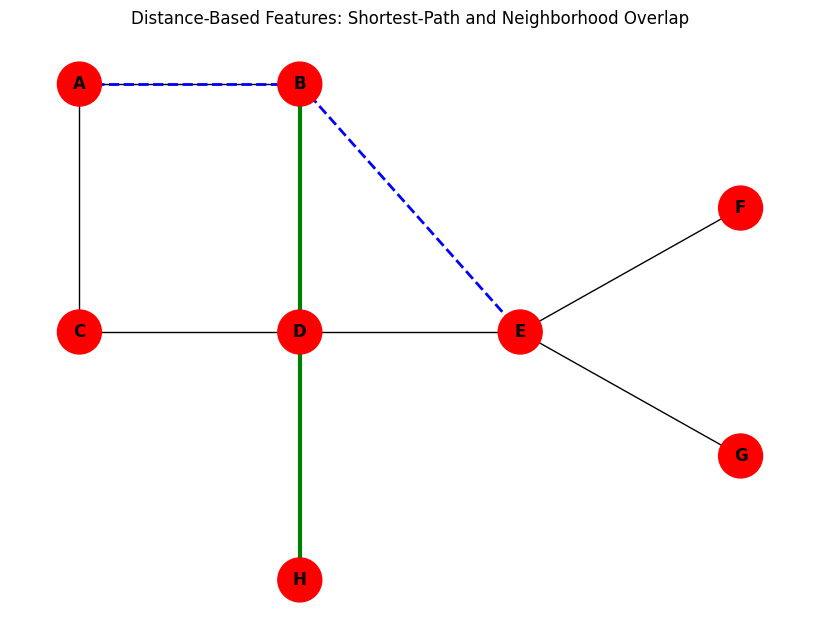

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add nodes and edges based on the example
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), 
         ('D', 'E'), ('E', 'F'), ('E', 'G'), ('D', 'H')]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define positions for nodes
pos = {
    'A': (0, 2),
    'B': (2, 2),
    'C': (0, 0),
    'D': (2, 0),
    'E': (4, 0),
    'F': (6, 1),
    'G': (6, -1),
    'H': (2, -2)
}

# Define node colors
node_colors = ['red' for _ in nodes]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, edge_color='black', 
    node_size=1000, font_size=12, font_weight='bold'
)

# Highlight shortest paths
shortest_paths = [('B', 'H'), ('B', 'E'), ('A', 'B')]
nx.draw_networkx_edges(G, pos, edgelist=shortest_paths, width=2, edge_color='blue', style='dashed')

# Highlight the pair with greater overlap
overlap_pairs = [('B', 'H')]
nx.draw_networkx_edges(G, pos, edgelist=overlap_pairs, width=3, edge_color='green')

plt.title("Distance-Based Features: Shortest-Path and Neighborhood Overlap")
plt.show()

# Local Neighborhood Overlap

- **Definition:** Measures the number of neighboring nodes shared between two nodes $v_1$ and $v_2$.


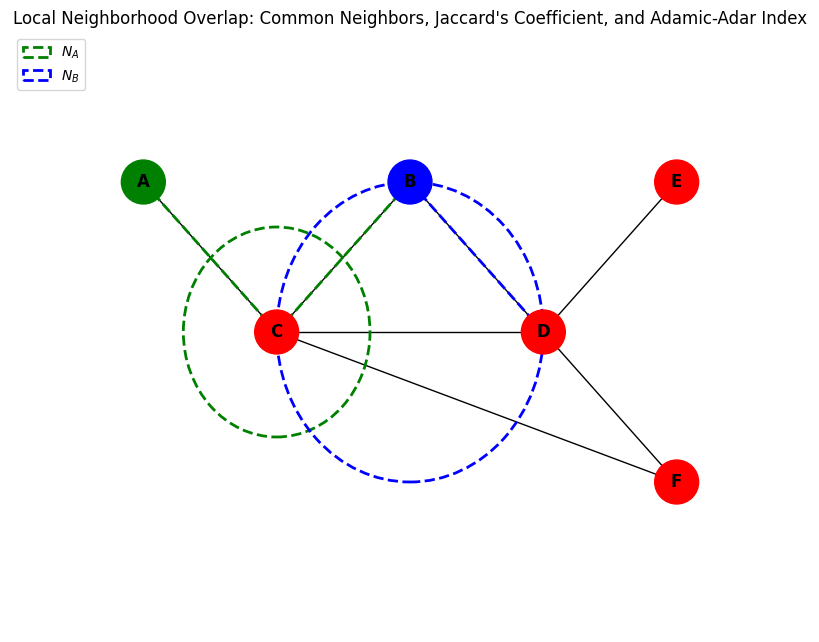

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add nodes and edges based on the example, including the connection C-F
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), 
         ('D', 'E'), ('D', 'F'), ('C', 'F')]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define positions for nodes
pos = {
    'A': (0, 2),
    'B': (2, 2),
    'C': (1, 1),
    'D': (3, 1),
    'E': (4, 2),
    'F': (4, 0)
}

# Define node colors
node_colors = ['green', 'blue', 'red', 'red', 'red', 'red']

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, edge_color='black', 
    node_size=1000, font_size=12, font_weight='bold'
)

# Highlight shared neighbors with dashed circles
nx.draw_networkx_edges(G, pos, edgelist=[('A', 'C'), ('B', 'C')], width=2, edge_color='green', style='dashed')
nx.draw_networkx_edges(G, pos, edgelist=[('B', 'D')], width=2, edge_color='blue', style='dashed')

# Add dashed circles around neighborhoods
circle1 = plt.Circle((1, 1), 0.7, color='green', fill=False, linestyle='dashed', linewidth=2, label='$N_A$')
circle2 = plt.Circle((2, 1), 1.0, color='blue', fill=False, linestyle='dashed', linewidth=2, label='$N_B$')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

# Set the limits and title
plt.xlim(-1, 5)
plt.ylim(-1, 3)
plt.title("Local Neighborhood Overlap: Common Neighbors, Jaccard's Coefficient, and Adamic-Adar Index")
plt.legend(loc='upper left')
plt.axis('off')
plt.show()

### Common Neighbors:
- **Formula:** $|N(v_1) \cap N(v_2)|$
- **Explanation:** This metric counts the exact number of shared neighbors between two nodes, indicating direct overlap in their immediate neighborhoods.
- **Example:** $|N(A) \cap N(B)| = \{C\} = 1$

### Jaccard's Coefficient:
- **Formula:** $\frac{|N(v_1) \cap N(v_2)|}{|N(v_1) \cup N(v_2)|}$
- **Explanation:** This coefficient normalizes the number of common neighbors by the total number of unique neighbors, providing a ratio that reflects the relative overlap.
- **Example:** $\frac{|N(A) \cap N(B)|}{|N(A) \cup N(B)|} = \frac{\{C\}}{\{C, D\}} = \frac{1}{2}$


### Adamic-Adar Index:
- **Formula:** $\text{Adamic-Adar}(v_1, v_2) = \sum\limits_{u \in N(v_1) \cap N(v_2)} \frac{1}{\log(k_u)}$
- **Explanation:** This index assigns more weight to less connected (more unique) common neighbors, reducing the influence of highly connected nodes within the graph.
- **Example:** For nodes $A$ and $B$, with $C$ as their common neighbor: $\frac{1}{\log(k_C)} = \frac{1}{\log(4)}$

# Global Neighborhood Overlap

- **Limitation of Local Neighborhood Features:**
  - The metric is always zero if two nodes do not have any common neighbors.
  - For example: If $N_A \cap N_E = \emptyset$, then $|N_A \cap N_E| = 0$.
  
- **Implication:**
  - Even if two nodes have no shared neighbors, they might still be connected in the future, suggesting a potential link that local metrics cannot capture.

- **Global Neighborhood Overlap:**
  - **Solution:** Global neighborhood overlap metrics address this limitation by considering the entire graph structure, not just direct neighbors, to predict potential connections.
  

# Global Neighborhood Overlap

## Katz Index:
- **Definition:** Counts the number of paths of all lengths between a given pair of nodes.
- **Purpose:** Unlike local measures, the Katz index takes into account paths that are not just direct connections, capturing indirect relationships within the graph.


## Key Question:
- **Q:** How to compute the number of paths between two nodes?


## Solution: Adjacency Matrix
- **Use powers of the graph adjacency matrix:**
  - The entries in the $k$-th power of the adjacency matrix represent the number of paths of length $k$ between nodes.
  - This method allows for the calculation of paths of various lengths, contributing to a more comprehensive understanding of node connectivity in the graph.

# Intuition: Powers of Adjacency Matrices

## Computing the Number of Paths Between Two Nodes

- **Recall:** 
  - $A_{uv} = 1$ if $u \in N(v)$ (i.e., if nodes $u$ and $v$ are neighbors).
  
- **Path Count Definition:**
  - Let $P_{uv}^{(K)}$ represent the number of paths of length $K$ between nodes $u$ and $v$.
  
- **Key Concept:**
  - We can demonstrate that $P^{(K)} = A^K$, where $A^K$ represents the $K$-th power of the adjacency matrix $A$.
  


- **Example:**
  - For paths of length 1 (direct connections), $P_{uv}^{(1)} = A_{uv}$.
  - For example, $P_{12}^{(1)} = A_{12}$.

## Example Adjacency Matrix:

- Given the graph:

$ 
A = 
\begin{bmatrix}
0 & 1 & 0 & 1 \\
1 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 \\
1 & 1 & 1 & 0
\end{bmatrix}
$


- Here, $P_{12}^{(1)} = A_{12} = 1$, indicating a direct path between nodes 1 and 2.

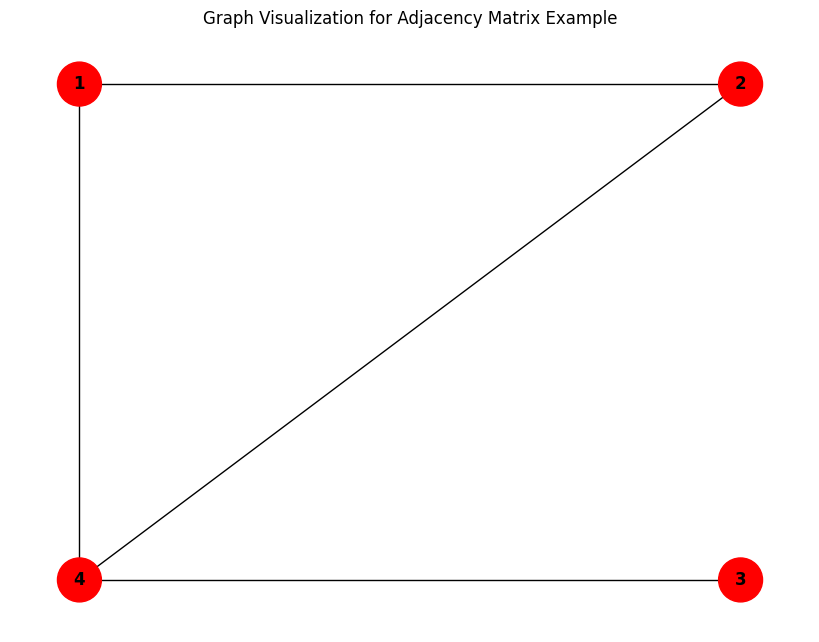

Adjacency Matrix A:
[[0 1 0 1]
 [1 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]


In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a graph object
G = nx.Graph()

# Add nodes and edges based on the example
nodes = [1, 2, 3, 4]
edges = [(1, 2), (1, 4), (4, 2), (4, 3)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Define positions for nodes
pos = {
    1: (0, 1),
    2: (1, 1),
    3: (1, 0),
    4: (0, 0)
}

# Define node colors
node_colors = ['red', 'red', 'red', 'red']

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, edge_color='black', 
    node_size=1000, font_size=12, font_weight='bold'
)

plt.title("Graph Visualization for Adjacency Matrix Example")
plt.show()

# Generate the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()

# Display the adjacency matrix?
print("Adjacency Matrix A:")
print(adj_matrix)

# Intuition: Powers of Adjacency Matrices

## How to Compute $P_{uv}^{(2)}$?


### Step 1: Compute the Number of Paths of Length 1 Between Each of $u$'s Neighbors and $v$
- Identify all neighbors of node $u$.
- Count the paths of length 1 from each neighbor of $u$ to node $v$.

### Step 2: Sum Up the Number of Paths Across $u$'s Neighbors
- Aggregate the path counts from Step 1 to get the total number of paths of length 2 between $u$ and $v$.

### Formula:
$$
P_{uv}^{(2)} = \sum_i A_{ui} \times P_{iv}^{(1)} = \sum_i A_{ui} \times A_{iv} = A_{uv}^2
$$

## Example Calculation:

- Adjacency matrix $A$:

$$
A = 
\begin{bmatrix}
0 & 1 & 0 & 1 \\
1 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 \\
1 & 1 & 1 & 0
\end{bmatrix}
$$


- Compute the square of the adjacency matrix $A^2$:

$$
A^2 = 
\begin{bmatrix}
2 & 1 & 1 & 1 \\
1 & 2 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 3
\end{bmatrix}
$$

- Example: $P_{12}^{(2)} = A_{12}^2 = 1$, indicating the number of paths of length 2 between nodes 1 and 2.

# Global Neighborhood Overlap

## Katz Index:


- **Definition:** Counts the number of paths of all lengths between a pair of nodes, incorporating both direct and indirect connections.

## How to Compute the Number of Paths Between Two Nodes?
- **Use Adjacency Matrix Powers:**
  - The adjacency matrix, $A$, can be used to find paths of various lengths between nodes by raising it to different powers.

### Key Points:
- $A_{uv}$ specifies the number of paths of length 1 (direct connections) between nodes $u$ and $v$.
- $A_{uv}^2$ specifies the number of paths of length 2 (via a neighbor of $u$) between nodes $u$ and $v$.
- More generally, $A_{uv}^l$ specifies the number of paths of length $l$ between nodes $u$ and $v$.


### Summary:
- Using the powers of the adjacency matrix provides a comprehensive view of connectivity within the graph, as it captures all potential paths of varying lengths, thus reflecting the global structure of the graph.

# Global Neighborhood Overlap

## Katz Index:
- **Definition:** The Katz index between nodes $v_1$ and $v_2$ measures the influence of all paths between these nodes, weighted by path length and a discount factor.

### Formula:
$$
S_{v_1 v_2} = \sum_{l=1}^{\infty} \beta^l A_{v_1 v_2}^l
$$

- **Explanation:**
  - $A_{v_1 v_2}^l$: Number of paths of length $l$ between nodes $v_1$ and $v_2$.
  - $\beta$: A discount factor with $0 < \beta < 1$, used to weigh paths by their lengths, giving shorter paths more influence.


## Katz Index Matrix in Closed-Form:
- The Katz index matrix can be computed in closed-form as:

$$
S = \sum_{i=1}^{\infty} \beta^i A^i = (I - \beta A)^{-1} - I
$$

- **Explanation:**
  - This expression uses the geometric series of matrices to sum the contributions of all path lengths.
  - $I$: Identity matrix.
  - $(I - \beta A)^{-1}$: Matrix inversion to incorporate all path contributions efficiently.


### Key Points:
- The Katz index captures global connectivity by accounting for both direct and indirect paths, allowing for a more comprehensive measure of node influence within the graph.
- The discount factor $\beta$ ensures convergence and appropriately scales the contribution of longer paths.

# Summarize Link-Level Features



## Distance-Based Features:
- **Definition:** Uses the shortest path length between two nodes.
- **Limitation:** Does not capture how neighborhoods overlap.

## Local Neighborhood Overlap:
- **Definition:** Captures how many neighboring nodes are shared by two nodes.
- **Limitation:** Becomes zero when no neighbor nodes are shared, limiting its effectiveness for disconnected nodes.


## Global Neighborhood Overlap:
- **Definition:** Uses the global graph structure to score two nodes.
- **Example:** The Katz index counts the number of paths of all lengths between two nodes, incorporating both direct and indirect connections.

<left><img width=25% src="img/gw_monogram_2c.png"></left>


# Part 4: Graph-Level Features



# Graph-Level Features

## Goal:
- To identify features that characterize the structure of an entire graph.

## For Example:
- Consider the graph shown, where the goal is to extract features that represent its overall structure, rather than focusing on individual nodes or edges.
 

# Background: Kernel Methods

## Introduction to Kernel Methods:
- **Definition:** Kernel methods are widely used in traditional machine learning for graph-level prediction tasks.
- **Concept:** Instead of designing feature vectors directly, we design **kernels** to measure similarity between data points (graphs).

### Why Kernels?
- Kernels allow us to implicitly map data into high-dimensional spaces where it may be easier to perform tasks like classification or regression.
- This is particularly useful for graph data, where defining explicit feature vectors can be complex.

# Designing Kernels

## Idea: Design Kernels Instead of Feature Vectors
- **Kernels:** Functions that measure similarity between pairs of data points, $K(G, G')$, where $G$ and $G'$ are graphs.
- By using kernels, we bypass the need to explicitly compute the feature vectors of graphs, focusing directly on their pairwise similarities.

### Advantages:
- Kernels can implicitly handle high-dimensional and even infinite-dimensional feature spaces.
- This approach can capture complex relationships between data points that might be missed by standard feature vectors.

# Understanding Kernels

## Quick Introduction to Kernels:

### Kernel Function:
- **Definition:** A kernel function $K(G, G') \in \mathbb{R}$ measures the similarity between two data points (graphs).
- **Example:** A popular kernel function is the Gaussian kernel, which measures similarity based on the distance between points in feature space.

### Kernel Matrix:
- **Definition:** A kernel matrix $K = (K(G, G'))_{G, G'}$ encapsulates the pairwise similarities of all data points in the dataset.
- **Property:** The kernel matrix must be positive semidefinite (i.e., all eigenvalues are positive).

# Mathematical Foundation of Kernels

## Feature Representation:
- **Existence of Feature Map:** There exists a feature representation $\phi(\cdot)$ such that:
  
  $$
  K(G, G') = \phi(G)^T \phi(G')
  $$

- **Explanation:** This equation implies that the kernel function computes the inner product of the feature representations of two data points in some high-dimensional space.

### Practical Implication:
- You don't need to explicitly compute $\phi(G)$; the kernel function implicitly does this.

# Application of Kernels in Machine Learning

## Using Kernels for Graph-Level Prediction:
- Once a kernel is defined, standard machine learning models can be applied, such as **Kernel SVM**.
- **Kernel SVM (Support Vector Machine):** A powerful algorithm that uses kernel functions to find a hyperplane that best separates the data points in high-dimensional space.

### Key Points:
- **Flexibility:** Kernels can be tailored to specific tasks by defining custom similarity measures.
- **Efficiency:** Allows complex models to be trained without the need to compute high-dimensional feature vectors explicitly.

# <span style="color:red">Refresher:</span> Positive Definite Matrix

## Definition:
- A matrix $A \in \mathbb{R}^{n \times n}$ is positive definite if for all non-zero vectors $x \in \mathbb{R}^n$:
  
  $$
  x^T A x > 0
  $$

## Properties:
- All eigenvalues are positive.
- The matrix is symmetric ($A = A^T$).

## Example:
$$
A = 
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

# <span style="color:red">Refresher:</span> Positive Semi-Definite Matrix

## Definition:
- A matrix $A \in \mathbb{R}^{n \times n}$ is positive semi-definite if for all vectors $x \in \mathbb{R}^n$:
  
  $$
  x^T A x \geq 0
  $$

## Properties:
- All eigenvalues are non-negative.
- The matrix is symmetric.

## Example:
$$
A = 
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}
$$

# <span style="color:red">Refresher:</span> Negative Definite Matrix

## Definition:
- A matrix $A \in \mathbb{R}^{n \times n}$ is negative definite if for all non-zero vectors $x \in \mathbb{R}^n$:
  
  $$
  x^T A x < 0
  $$

## Properties:
- All eigenvalues are negative.
- The matrix is symmetric.

## Example:
$$
A = 
\begin{bmatrix}
-2 & 0 \\
0 & -3
\end{bmatrix}
$$

# <span style="color:red">Refresher:</span> Negative Semi-Definite Matrix

## Definition:
- A matrix $A \in \mathbb{R}^{n \times n}$ is negative semi-definite if for all vectors $x \in \mathbb{R}^n$:
  
  $$
  x^T A x \leq 0
  $$

## Properties:
- All eigenvalues are non-positive.
- The matrix is symmetric.

## Example:
$$
A = 
\begin{bmatrix}
0 & 0 \\
0 & -1
\end{bmatrix}
$$

# <span style="color:red">Refresher:</span> Indefinite Matrix

## Definition:
- A matrix $A \in \mathbb{R}^{n \times n}$ is indefinite if there exist some vectors $x \in \mathbb{R}^n$ such that:
  
  $$
  x^T A x > 0 \quad \text{and} \quad x^T A x < 0
  $$

## Properties:
- Has both positive and negative eigenvalues.
- Can be **symmetric or asymmetric**.

## Example:
$$
A = 
\begin{bmatrix}
1 & 2 \\
2 & -3
\end{bmatrix}
$$

- This example is symmetric and has eigenvalues of opposite signs ($1 + \sqrt{17}$ and $1 - \sqrt{17}$).
  
Another example with a non-symmetric matrix:

$$
A = 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
$$

- This matrix is asymmetric with eigenvalues $5.372$ and $-0.372$, demonstrating indefiniteness.

# Graph Kernel: Key Idea

## Goal:
- **Design graph feature vector** $\phi(G)$

## Key Idea: Bag-of-Words (BoW) for a Graph
- **Recall:** Bag-of-Words (BoW) uses word counts as features for documents without considering the order.
- **Naive Extension to a Graph:** Treat nodes as "words".
  
### Problem with Naive Approach:
- Imagine two graphs both with 4 nodes but different edges, the naive BoW approach assigns the same feature vector to two different graphs.
  
  $$
  \phi(\text{Graph 1}) = \phi(\text{Graph 2})
  $$

- This highlights a limitation of using simple counts for graph representation as it overlooks the structural differences.


# Graph Kernel: Key Idea

## Bag of Node Degrees

### Problem Statement:
- **Previous Issue:** Using a naive Bag-of-Words (BoW) approach by treating nodes as "words" results in the same feature vector for different graphs.
- **Improvement:** Use the **Bag of Node Degrees** to differentiate graphs.

### Key Idea:
- **Node Degree Representation:** Count the occurrences of nodes with different degrees (connectivity) within a graph.


### Example:
- **Graph 1:** 
  - Count of nodes by degree: 
    - Degree 1 (green): 1
    - Degree 2 (purple): 3
    - Degree 3 (orange): 0
  - Feature Vector: $\phi(G_1) = [1, 3, 0]$

- **Graph 2:**
  - Count of nodes by degree:
    - Degree 1 (green): 0
    - Degree 2 (purple): 2
    - Degree 3 (orange): 2
  - Feature Vector: $\phi(G_2) = [0, 2, 2]$

### Outcome:
- **Success:** Using node degrees obtains different feature vectors for different graphs, overcoming the limitations of the naive BoW approach.

### Extensions:
- **Graphlet Kernel and Weisfeiler-Lehman (WL) Kernel:** Use more sophisticated "Bag-of-*" representations to capture richer graph characteristics beyond node degrees.

# Graphlet Features

## Key Idea:
- **Count the number of different graphlets in a graph.**

## Important Note:
- The definition of graphlets here is slightly different from node-level features.

## Differences from Node-Level Features:
1. **Nodes in Graphlets:**
   - Nodes in graphlets do **not need to be connected**.
   - This allows for isolated nodes within graphlets.

2. **Graphlets Are Not Rooted:**
   - Unlike some node-level features, graphlets in this context are not centered around a specific root node.


# Graphlet Features: Examples

## Definition:
- Let $\mathcal{G}_k = (g_1, g_2, \ldots, g_{n_k})$ be a list of graphlets of size $k$.

### Examples:
- For $k = 3$, there are 4 possible graphlets:
  - **$g_1$:** A complete triangle with 3 connected nodes.
  - **$g_2$:** A line with 3 nodes in a sequence.
  - **$g_3$:** Three disconnected nodes.
  - **$g_4$:** Two connected nodes with an isolated node.

- For $k = 4$, there are 11 possible graphlets, which include:
  - Fully connected graph with 4 nodes.
  - Variations with nodes having different degrees of connectivity.
  - Graphlets with isolated nodes.


In [20]:
import networkx as nx
from itertools import combinations

def generate_graphlets(k):
    """Generate all unique graphlets of size k."""
    graphlets = []
    nodes = range(k)
    all_edges = list(combinations(nodes, 2))
    
    # Generate all combinations of edges to form graphlets
    for i in range(2 ** len(all_edges)):
        edges = [all_edges[j] for j in range(len(all_edges)) if (i >> j) & 1]
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        # Check if graphlet is unique by checking its isomorphism
        if not any(nx.is_isomorphic(G, g) for g in graphlets):
            graphlets.append(G)
    return graphlets

# Generate graphlets of size k=3 and k=4
graphlets_k3 = generate_graphlets(3)
graphlets_k4 = generate_graphlets(4)

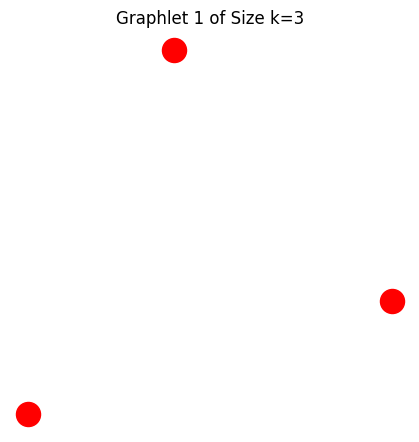

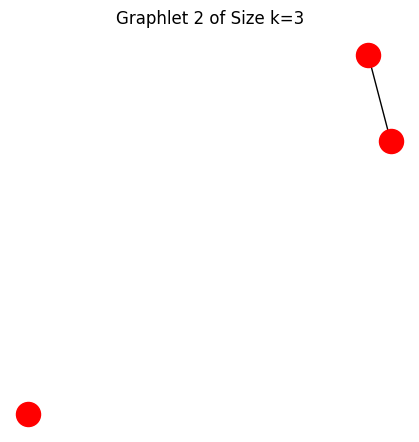

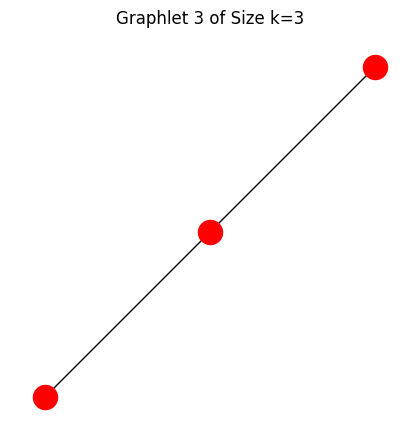

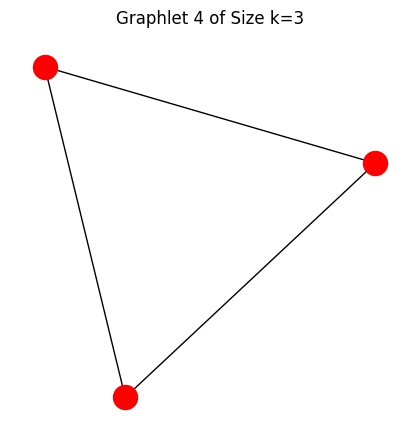

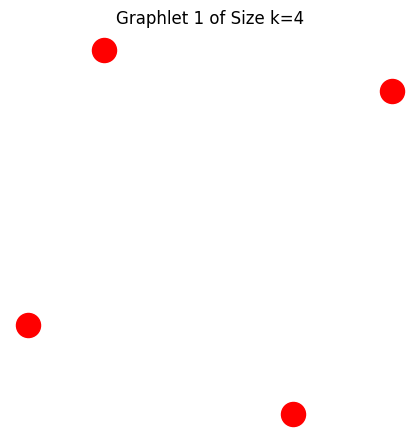

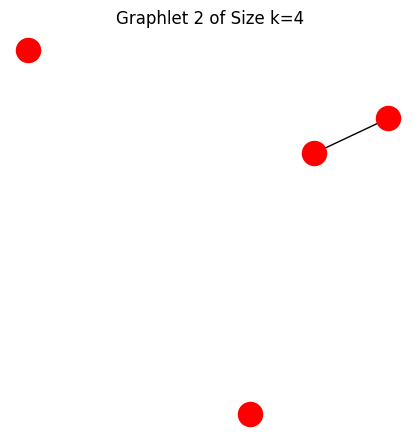

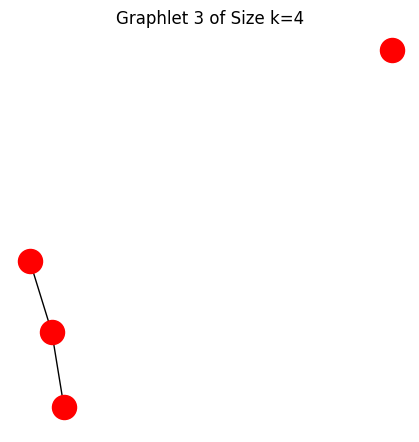

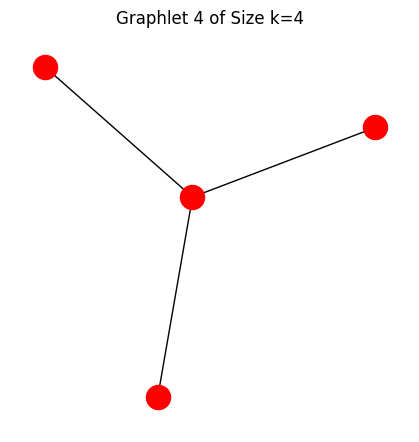

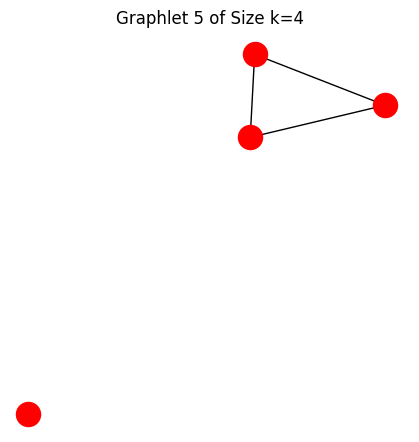

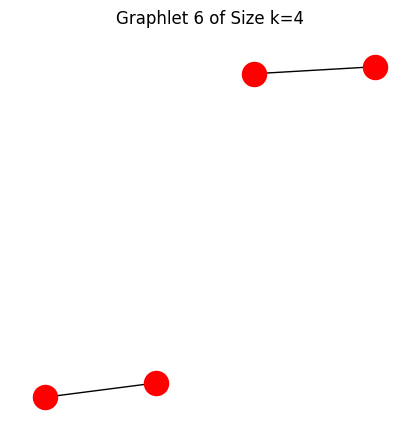

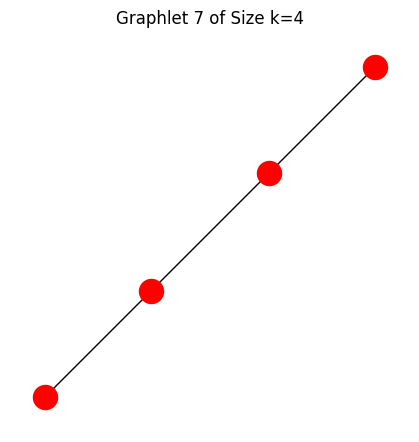

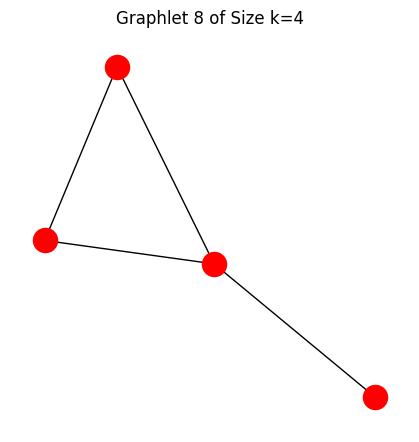

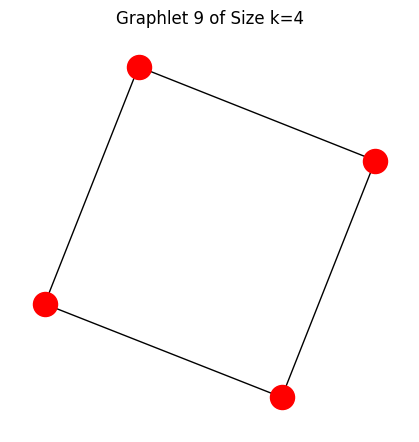

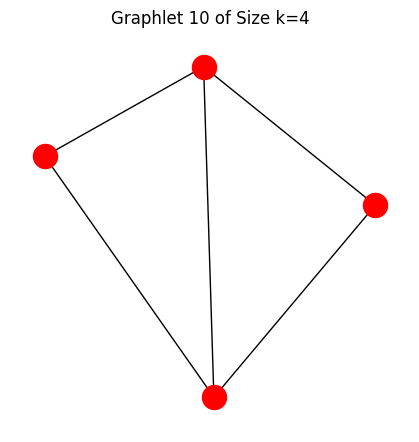

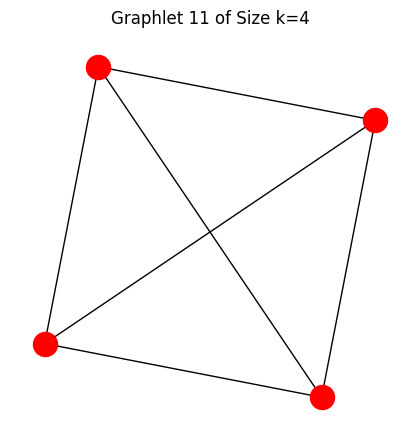

In [21]:
import matplotlib.pyplot as plt

def plot_single_graphlet(graph, title):
    """Plot a single graphlet with a title."""
    plt.figure(figsize=(4, 4))
    nx.draw(graph, with_labels=False, node_size=300, node_color='red', font_color='white')
    plt.title(title, fontsize=12)
    plt.show()

# Plot each graphlet of size k=3 in its own cell
for i, g in enumerate(graphlets_k3, 1):
    plot_single_graphlet(g, f"Graphlet {i} of Size k=3")

# Plot each graphlet of size k=4 in its own cell
for i, g in enumerate(graphlets_k4, 1):
    plot_single_graphlet(g, f"Graphlet {i} of Size k=4")

# Graphlet Features

## Definition:
- Given a graph $G$ and a graphlet list $\mathcal{G}_k = (g_1, g_2, \ldots, g_{n_k})$, we define the **graphlet count vector** $f_G \in \mathbb{R}^{n_k}$ as:

$$
(f_G)_i = \#(g_i \subseteq G) \text{ for } i = 1, 2, \ldots, n_k
$$

## Key Points:
- **Graphlet Count Vector**: Represents the frequency of each graphlet $g_i$ within the graph $G$.
- **Purpose**: This vector serves as a feature representation of the graph $G$, capturing the occurrence of various subgraph patterns.
- **Usage**: Useful in various graph analysis tasks, such as classification and clustering, where the structure of the graph is an important feature.

### Notes:
- **Graphlet Size $k$**: Determines the complexity and variety of subgraphs considered in the analysis.
- **Inclusion $g_i \subseteq G$**: A graphlet $g_i$ is counted if it is a subgraph within $G$, considering all possible embeddings.

# Graphlet Features

## Definition:
- Given a graph $G$ and a graphlet list $\mathcal{G}_k = (g_1, g_2, \ldots, g_{n_k})$, we define the **graphlet count vector** $f_G \in \mathbb{R}^{n_k}$ as:

$$(f_G)_i = \#(g_i \subseteq G) \text{ for } i = 1, 2, \ldots, n_k$$

## Key Points:
- **Graphlet Count Vector**: Represents the frequency of each graphlet $g_i$ within the graph $G$.
- **Purpose**: This vector serves as a feature representation of the graph $G$, capturing the occurrence of various subgraph patterns.
- **Usage**: Useful in various graph analysis tasks, such as classification and clustering, where the structure of the graph is an important feature.

### Notes:
- **Graphlet Size $k$**: Determines the complexity and variety of subgraphs considered in the analysis.
- **Inclusion $g_i \subseteq G$**: A graphlet $g_i$ is counted if it is a subgraph within $G$, considering all possible embeddings.

# Graphlet Kernel

## Definition:
- Given two graphs, $G$ and $G'$, the graphlet kernel is computed as:

$$
K(G, G') = f_G^T f_{G'}
$$

## Problem:
- If $G$ and $G'$ have different sizes, this can greatly skew the kernel value.

## Solution:
- **Normalization**: Normalize each feature vector to account for size differences.

$$
h_G = \frac{f_G}{\text{Sum}(f_G)} \quad \text{and} \quad K(G, G') = h_G^T h_{G'}
$$

### Key Points:
- **Normalization** ensures that the kernel value reflects the similarity in structure rather than the difference in graph sizes.
- **Graphlet Kernel**: Measures the similarity between graphs by comparing their graphlet count vectors after normalization.

Let me know if you need any further details or adjustments to this slide!

# Graphlet Kernel: Limitations

## Limitations:
- **Counting Graphlets is Expensive!**
  - Counting size-$k$ graphlets for a graph with size $n$ by enumeration takes $n^k$.
  - This is unavoidable in the worst-case since subgraph isomorphism testing (judging whether a graph is a subgraph of another graph) is **NP-hard**.

## Computational Challenges:
- **Subgraph Isomorphism**:
  - A critical task in graphlet counting that is computationally intensive and classified as NP-hard.

- **Algorithm Complexity**:
  - If a graph’s node degree is bounded by $d$, an $O(nd^{k-1})$ algorithm exists to count all the graphlets of size $k$.
  
## Key Question:
- Can we design a more efficient graph kernel?

### Key Takeaway:
- The computational cost of counting graphlets limits the scalability of the graphlet kernel, highlighting the need for more efficient methods to handle large graphs or high values of $k$.

Let me know if any adjustments or additional details are needed for this slide!